In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('call_center.csv')

In [14]:
df.head()

,id,Date,APPLICATION,OFFERED,ANSWERED,AVG ANS DELAY,AVG ANS DELAY SECONDS,MAX ANS DELAY,ABANDONED,DelayCallsProduct
0,2017-08-27-ccc_311_calgary_script,2017/08/27,ccc_311_calgary_script,1080,1023,00:00:39,39,00:17:53,59,39897
1,2017-08-27-ccc_311_lobby_ph_script,2017/08/27,ccc_311_lobby_ph_script,0,0,00:00:00,0,00:00:00,0,0
2,2017-08-27-ccc_aserv_info_script,2017/08/27,ccc_aserv_info_script,0,0,00:00:00,0,00:00:00,0,0
3,2017-08-27-ccc_bylaw_script,2017/08/27,ccc_bylaw_script,0,0,00:00:00,0,00:00:00,0,0
4,2017-08-27-ccc_city_script,2017/08/27,ccc_city_script,0,0,00:00:00,0,00:00:00,0,0


In [15]:
df.describe()

,OFFERED,ANSWERED,AVG ANS DELAY SECONDS,ABANDONED,DelayCallsProduct
count,38894.000000,38894.000000,38894.000000,38894.000000,3.889400e+04
mean,211.210110,182.051987,33.555330,29.131537,2.462517e+04
std,767.310995,649.645935,134.727452,165.047887,1.463622e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,11.000000,10.000000,12.000000,0.000000,1.680000e+02
max,12320.000000,5326.000000,2705.000000,7735.000000,5.419470e+06


In [16]:
df.columns

Index(['id', 'Date', 'APPLICATION', 'OFFERED', 'ANSWERED', 'AVG ANS DELAY',
       'AVG ANS DELAY SECONDS', 'MAX ANS DELAY', 'ABANDONED',
       'DelayCallsProduct'],
      dtype='object')

In [11]:
data = df

# Display basic information about the dataset
data_info = {
    'shape': data.shape,
    'columns': data.columns.tolist(),
    'head': data.head(),
    'description': data.describe(include='all')
}

data_info


{'shape': (38894, 10),
 'columns': ['id',
  'Date',
  'APPLICATION',
  'OFFERED',
  'ANSWERED',
  'AVG ANS DELAY',
  'AVG ANS DELAY SECONDS',
  'MAX ANS DELAY',
  'ABANDONED',
  'DelayCallsProduct'],
 'head':                                    id        Date              APPLICATION  \
 0   2017-08-27-ccc_311_calgary_script  2017/08/27   ccc_311_calgary_script   
 1  2017-08-27-ccc_311_lobby_ph_script  2017/08/27  ccc_311_lobby_ph_script   
 2    2017-08-27-ccc_aserv_info_script  2017/08/27    ccc_aserv_info_script   
 3         2017-08-27-ccc_bylaw_script  2017/08/27         ccc_bylaw_script   
 4          2017-08-27-ccc_city_script  2017/08/27          ccc_city_script   
 
    OFFERED  ANSWERED AVG ANS DELAY  AVG ANS DELAY SECONDS MAX ANS DELAY  \
 0     1080      1023      00:00:39                     39      00:17:53   
 1        0         0      00:00:00                      0      00:00:00   
 2        0         0      00:00:00                      0      00:00:00   
 3        0 

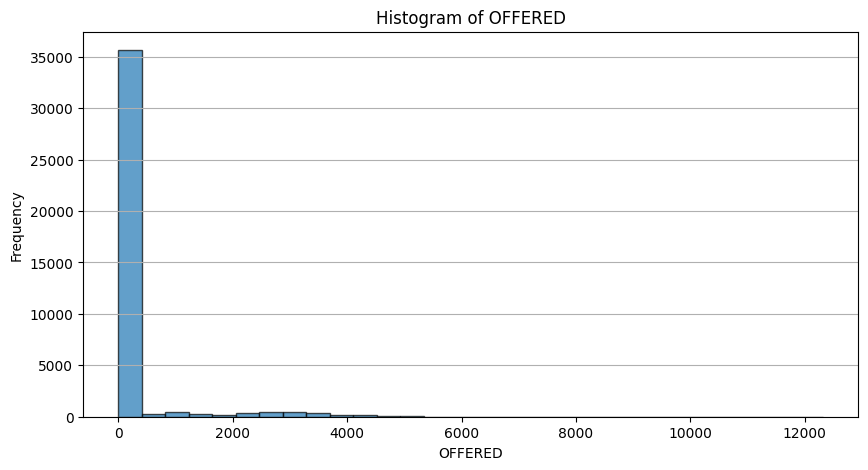

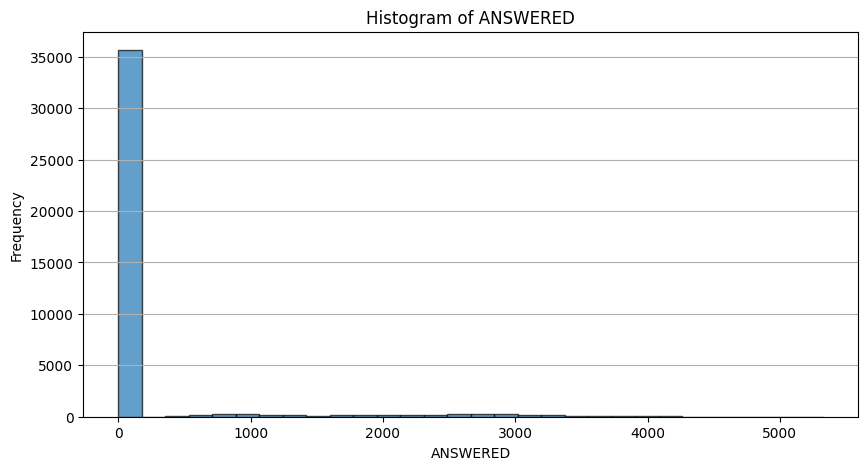

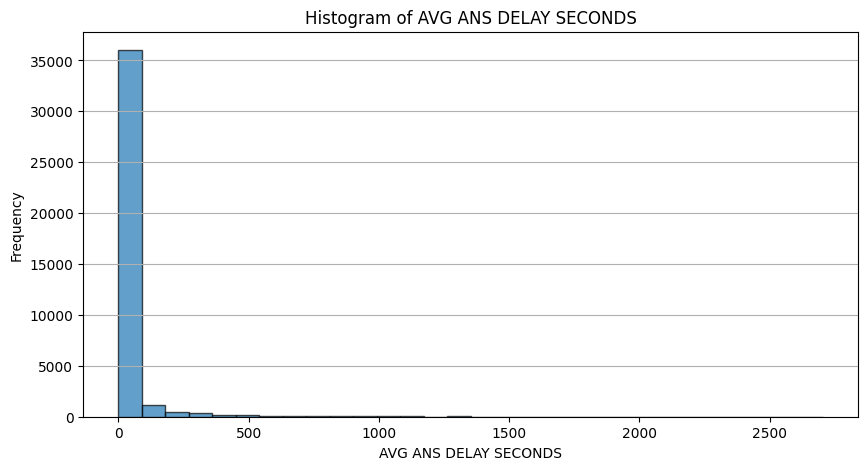

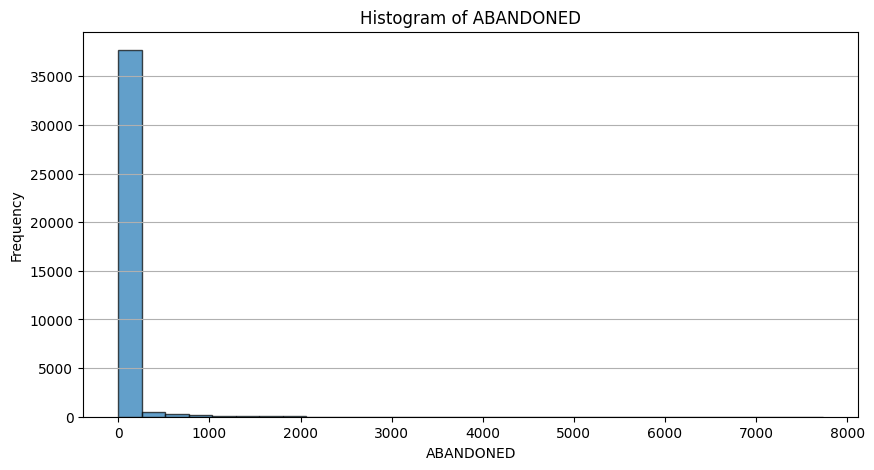

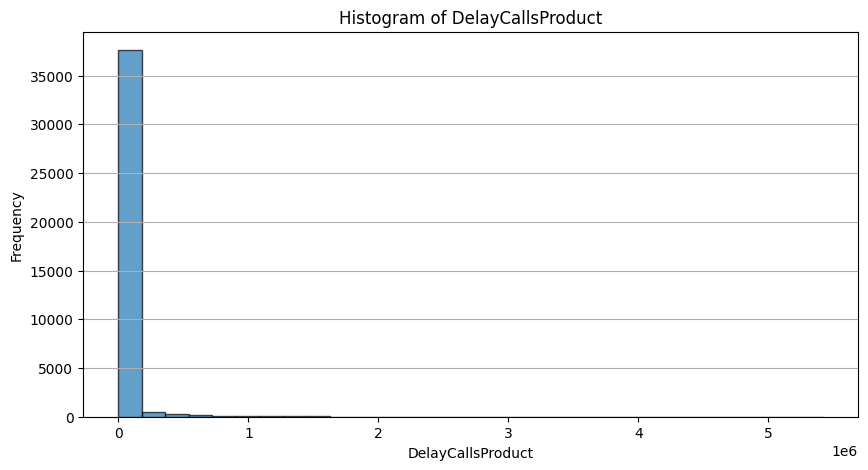

In [18]:

# Distribution Analysis
# Histograms for numerical columns
numerical_columns = ['OFFERED', 'ANSWERED', 'AVG ANS DELAY SECONDS', 'ABANDONED', 'DelayCallsProduct']

# Plot histograms
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()



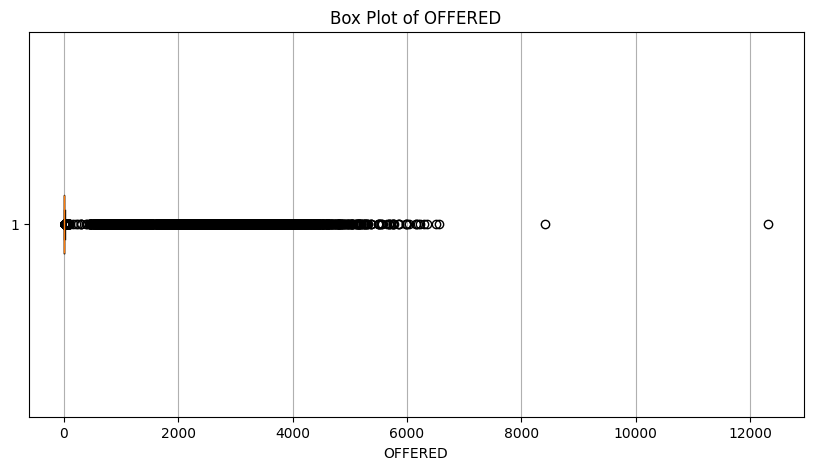

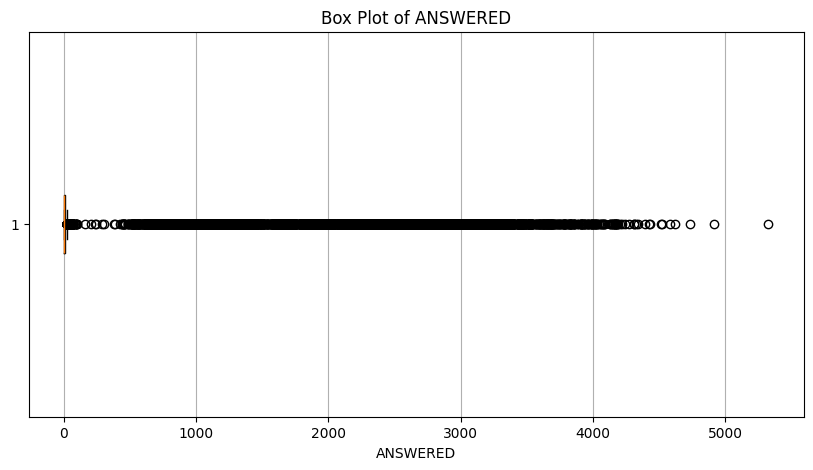

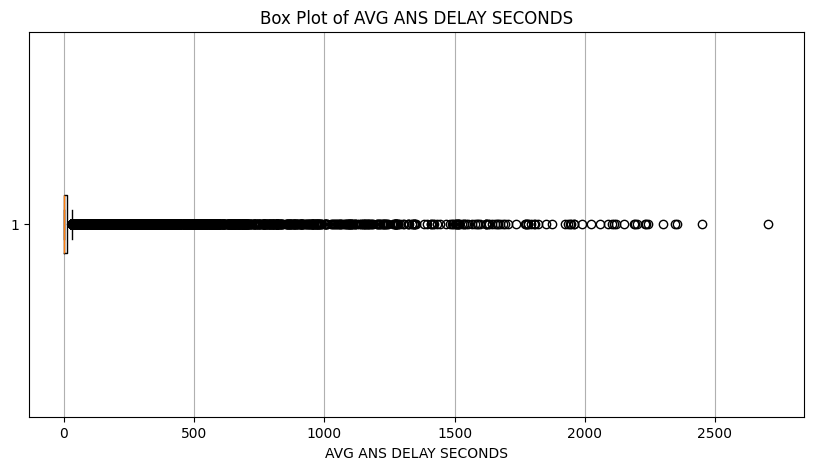

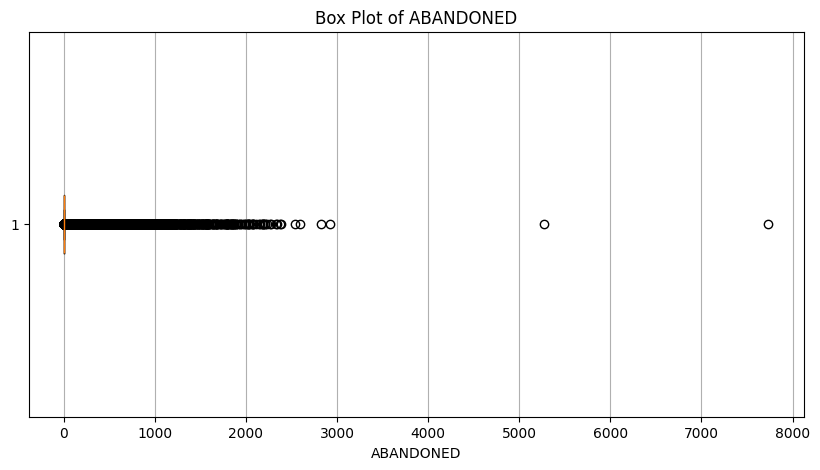

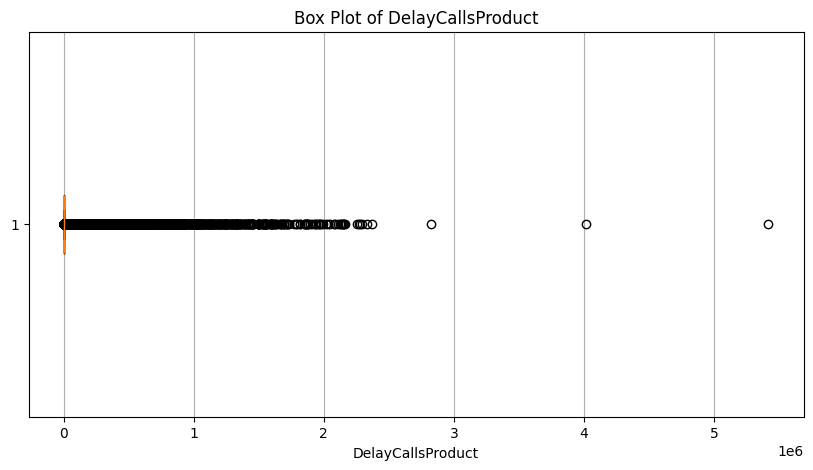

In [19]:
# Box Plots for numerical columns to detect outliers
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.grid(axis='x')
    plt.show()


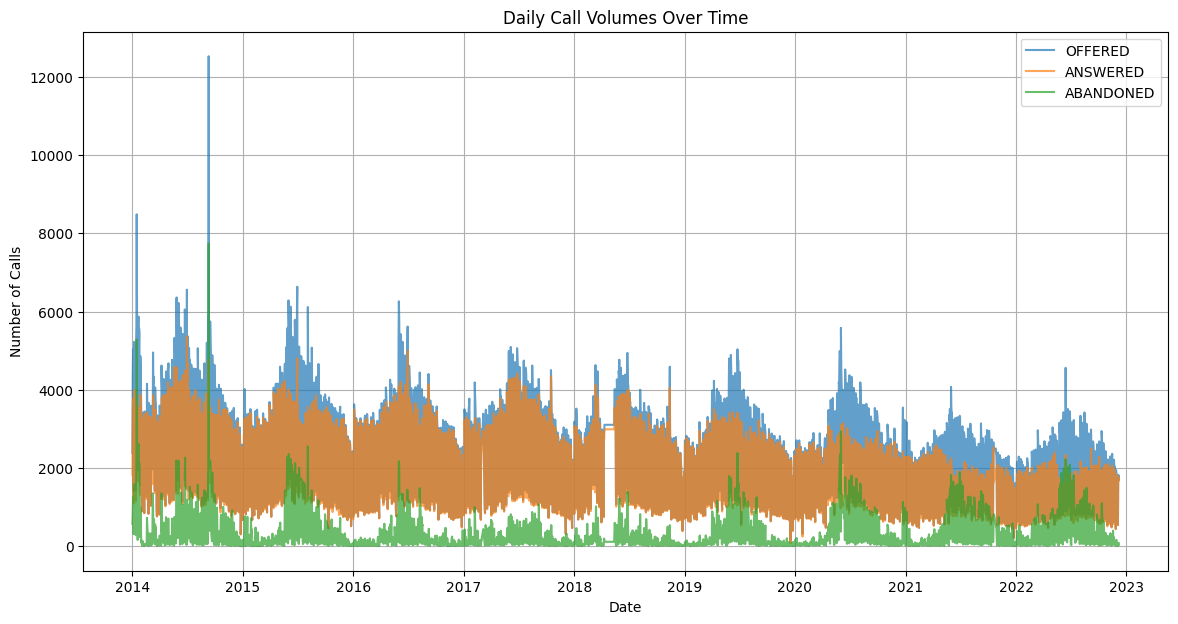

In [20]:

#  Time Series Trends
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

# Aggregate data by date
daily_data = data.groupby('Date').agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()

# Plot daily trends for 'OFFERED', 'ANSWERED', and 'ABANDONED' calls
plt.figure(figsize=(14, 7))
plt.plot(daily_data['Date'], daily_data['OFFERED'], label='OFFERED', alpha=0.7)
plt.plot(daily_data['Date'], daily_data['ANSWERED'], label='ANSWERED', alpha=0.7)
plt.plot(daily_data['Date'], daily_data['ABANDONED'], label='ABANDONED', alpha=0.7)
plt.title('Daily Call Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid()
plt.show()


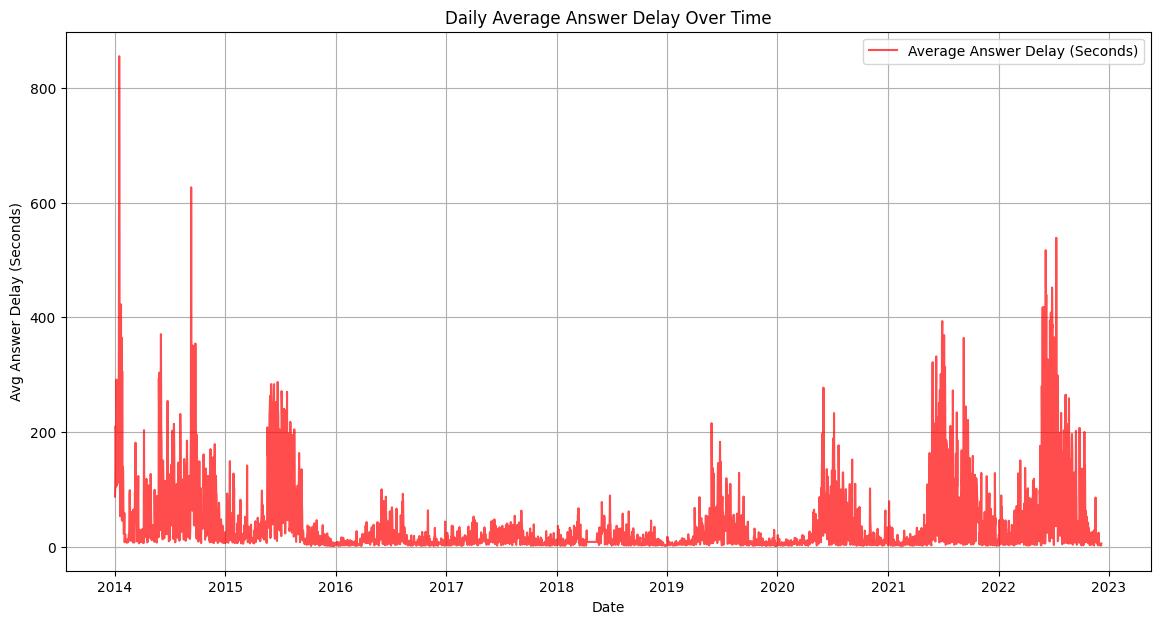

In [21]:

# Plot trend for 'AVG ANS DELAY SECONDS' over time
plt.figure(figsize=(14, 7))
plt.plot(daily_data['Date'], daily_data['AVG ANS DELAY SECONDS'], label='Average Answer Delay (Seconds)', color='r', alpha=0.7)
plt.title('Daily Average Answer Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Answer Delay (Seconds)')
plt.legend()
plt.grid()
plt.show()



In [22]:
# Application Analysis
# Group by 'APPLICATION' to calculate total calls, average delays, and abandonment rates for each application
application_analysis = data.groupby('APPLICATION').agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()



In [23]:
# Calculate abandonment rate and answer rate for each application
application_analysis['Abandonment Rate'] = application_analysis['ABANDONED'] / application_analysis['OFFERED']
application_analysis['Answer Rate'] = application_analysis['ANSWERED'] / application_analysis['OFFERED']



In [24]:
#  Weekly and Monthly Trends
# Create new columns for 'Week' and 'Month'
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.to_period('M')

# Aggregate data by week and month
weekly_data = data.groupby('Week').agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()

monthly_data = data.groupby('Month').agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()

In [25]:
# Correlation Analysis
correlation_matrix = data[['OFFERED', 'ANSWERED', 'AVG ANS DELAY SECONDS', 'ABANDONED', 'DelayCallsProduct']].corr()



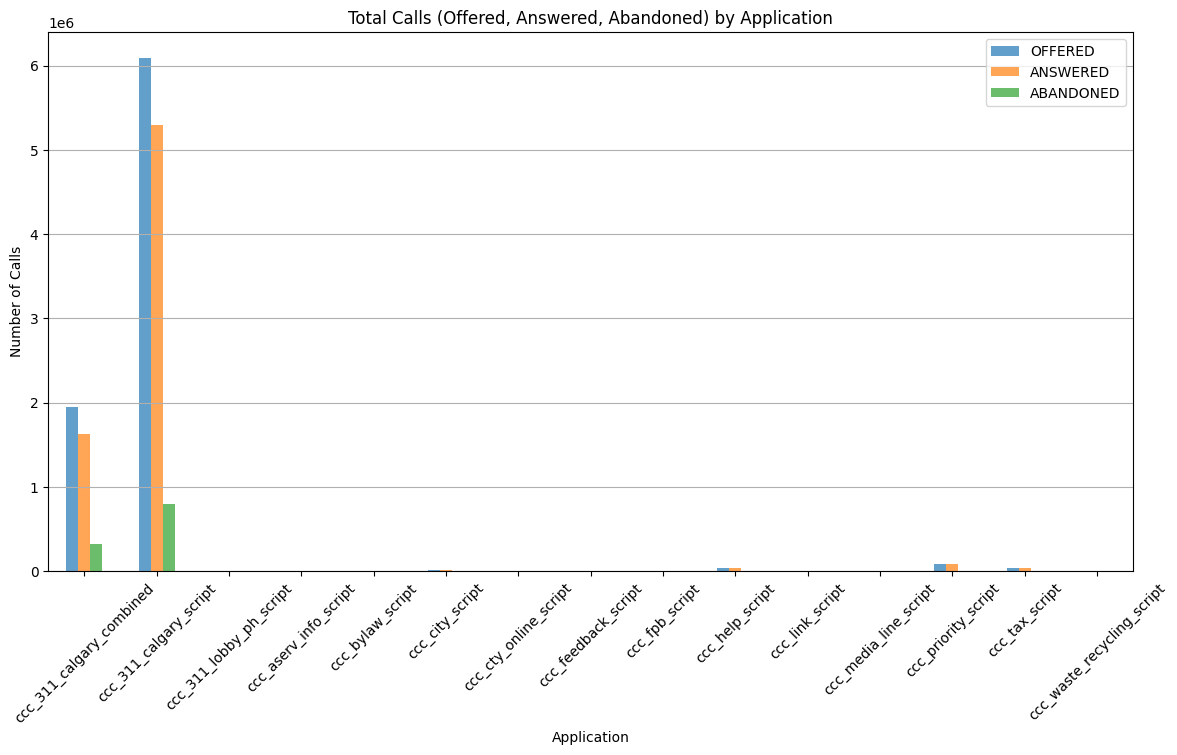

In [26]:
# Plot application analysis bar charts
application_analysis.set_index('APPLICATION')[['OFFERED', 'ANSWERED', 'ABANDONED']].plot(kind='bar', figsize=(14, 7), alpha=0.7)
plt.title('Total Calls (Offered, Answered, Abandoned) by Application')
plt.ylabel('Number of Calls')
plt.xlabel('Application')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

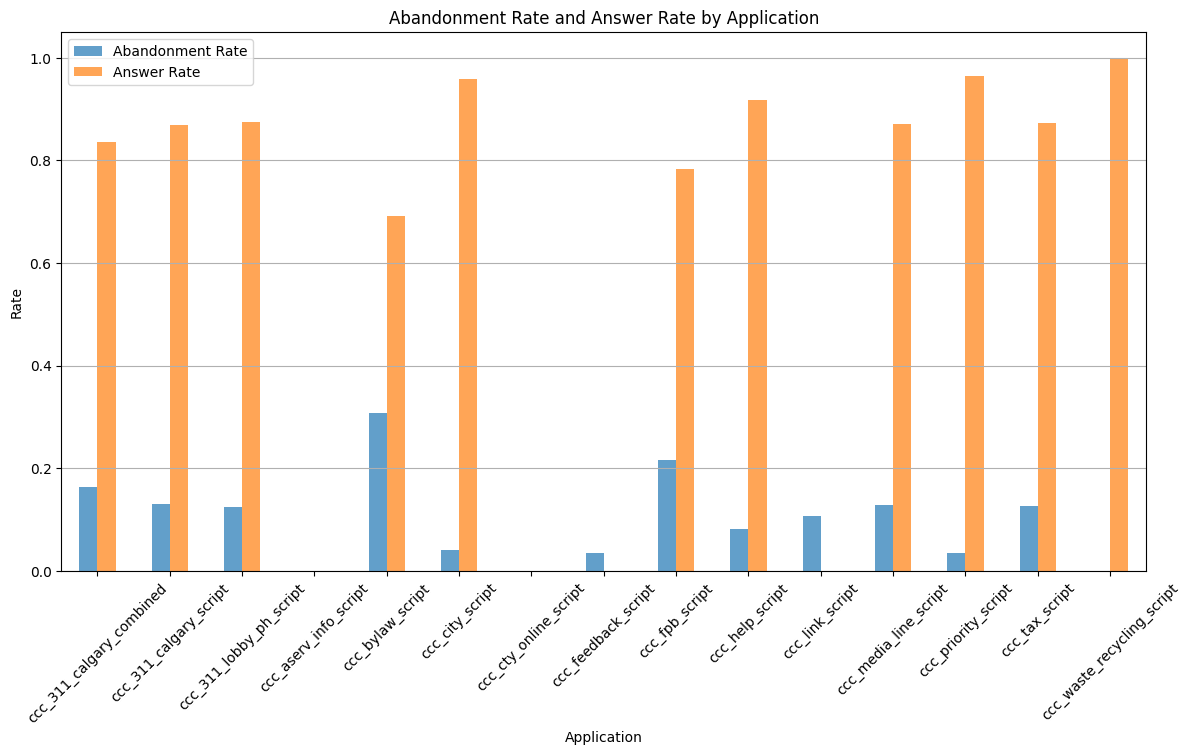

In [27]:
application_analysis.set_index('APPLICATION')[['Abandonment Rate', 'Answer Rate']].plot(kind='bar', figsize=(14, 7), alpha=0.7)
plt.title('Abandonment Rate and Answer Rate by Application')
plt.ylabel('Rate')
plt.xlabel('Application')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

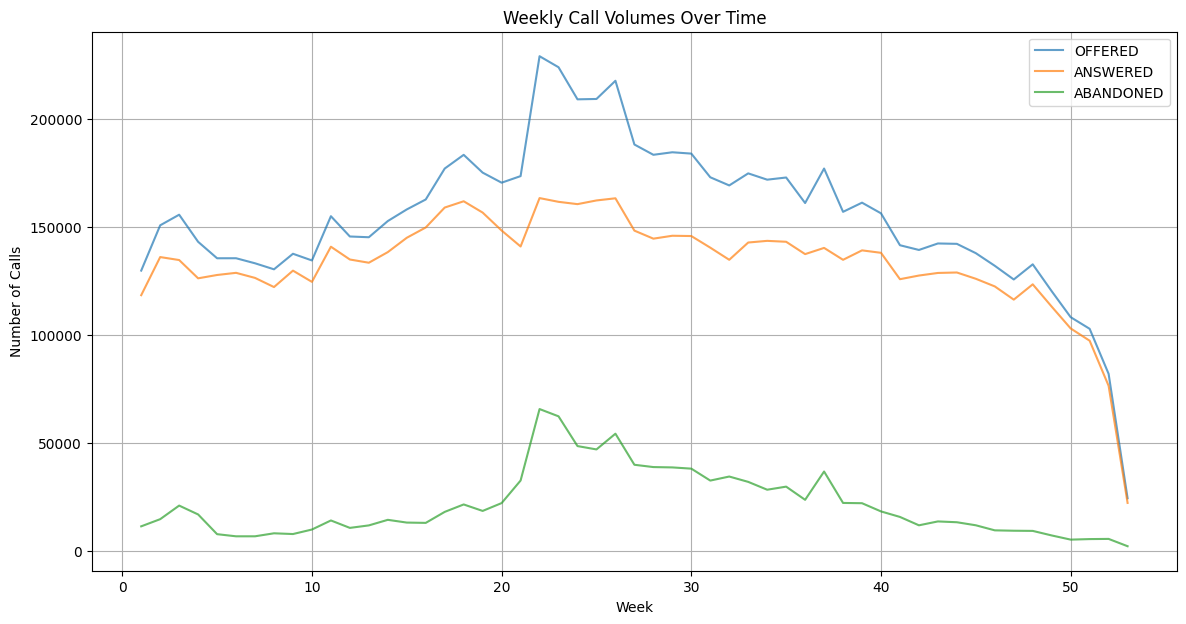

In [28]:
# Plot weekly trends for calls and delays
plt.figure(figsize=(14, 7))
plt.plot(weekly_data['Week'], weekly_data['OFFERED'], label='OFFERED', alpha=0.7)
plt.plot(weekly_data['Week'], weekly_data['ANSWERED'], label='ANSWERED', alpha=0.7)
plt.plot(weekly_data['Week'], weekly_data['ABANDONED'], label='ABANDONED', alpha=0.7)
plt.title('Weekly Call Volumes Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid()
plt.show()

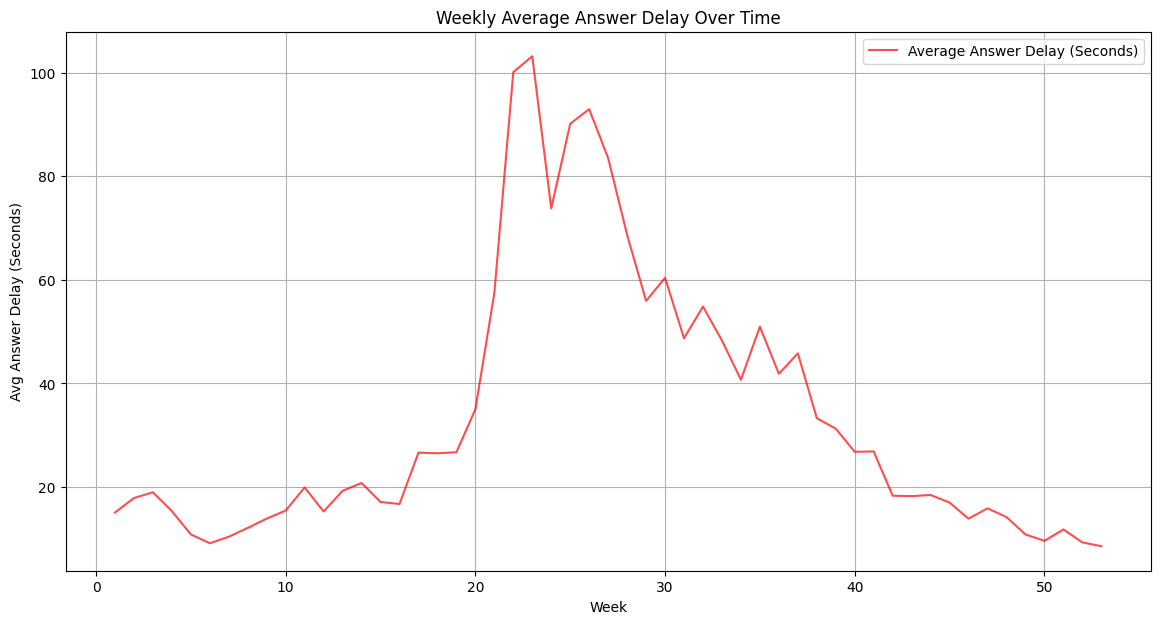

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_data['Week'], weekly_data['AVG ANS DELAY SECONDS'], label='Average Answer Delay (Seconds)', color='r', alpha=0.7)
plt.title('Weekly Average Answer Delay Over Time')
plt.xlabel('Week')
plt.ylabel('Avg Answer Delay (Seconds)')
plt.legend()
plt.grid()
plt.show()

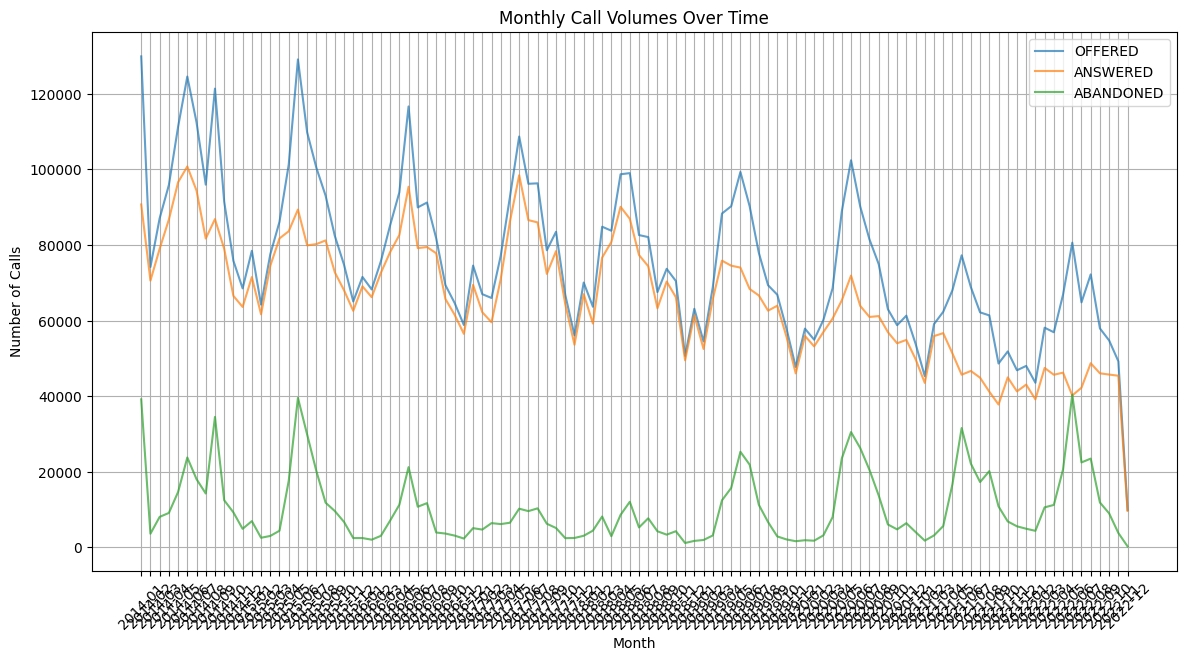

In [30]:
# Plot monthly trends for calls and delays
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'].astype(str), monthly_data['OFFERED'], label='OFFERED', alpha=0.7)
plt.plot(monthly_data['Month'].astype(str), monthly_data['ANSWERED'], label='ANSWERED', alpha=0.7)
plt.plot(monthly_data['Month'].astype(str), monthly_data['ABANDONED'], label='ABANDONED', alpha=0.7)
plt.title('Monthly Call Volumes Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

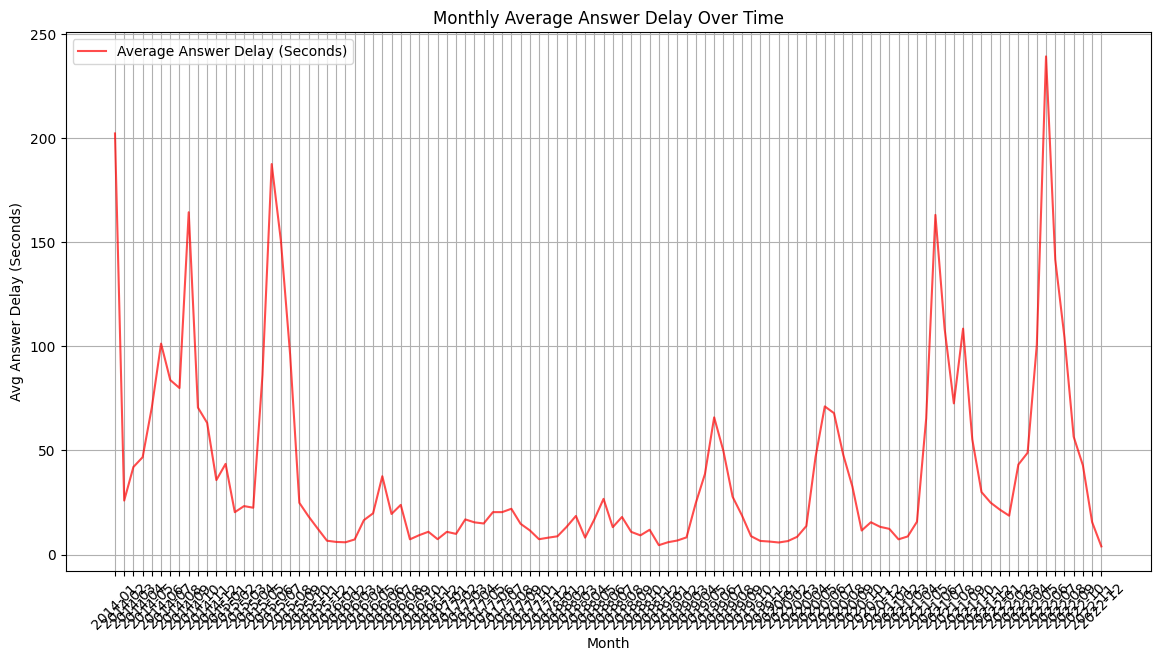

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'].astype(str), monthly_data['AVG ANS DELAY SECONDS'], label='Average Answer Delay (Seconds)', color='r', alpha=0.7)
plt.title('Monthly Average Answer Delay Over Time')
plt.xlabel('Month')
plt.ylabel('Avg Answer Delay (Seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



In [32]:
correlation_matrix

,OFFERED,ANSWERED,AVG ANS DELAY SECONDS,ABANDONED,DelayCallsProduct
OFFERED,1.000000,0.986536,0.271611,0.765524,0.725546
ANSWERED,0.986536,1.000000,0.211560,0.649996,0.608045
AVG ANS DELAY SECONDS,0.271611,0.211560,1.000000,0.429852,0.468338
ABANDONED,0.765524,0.649996,0.429852,1.000000,0.979330
DelayCallsProduct,0.725546,0.608045,0.468338,0.979330,1.000000


In [33]:
# Delay Analysis by Application
# Focus on applications with high average delays
delay_by_application = data.groupby('APPLICATION').agg({
    'AVG ANS DELAY SECONDS': 'mean',
    'MAX ANS DELAY': 'count'
}).reset_index().sort_values(by='AVG ANS DELAY SECONDS', ascending=False)

# Outlier Detection in Daily Data
# Identify days with unusually high call volumes or delays using a threshold for the top 5% of values
high_offer_threshold = daily_data['OFFERED'].quantile(0.95)
high_delay_threshold = daily_data['AVG ANS DELAY SECONDS'].quantile(0.95)

outliers_offer = daily_data[daily_data['OFFERED'] > high_offer_threshold]
outliers_delay = daily_data[daily_data['AVG ANS DELAY SECONDS'] > high_delay_threshold]

# Trend Analysis for Abandonment and Answer Rates Over Time
# Calculate weekly abandonment and answer rates
weekly_data['Abandonment Rate'] = weekly_data['ABANDONED'] / weekly_data['OFFERED']
weekly_data['Answer Rate'] = weekly_data['ANSWERED'] / weekly_data['OFFERED']

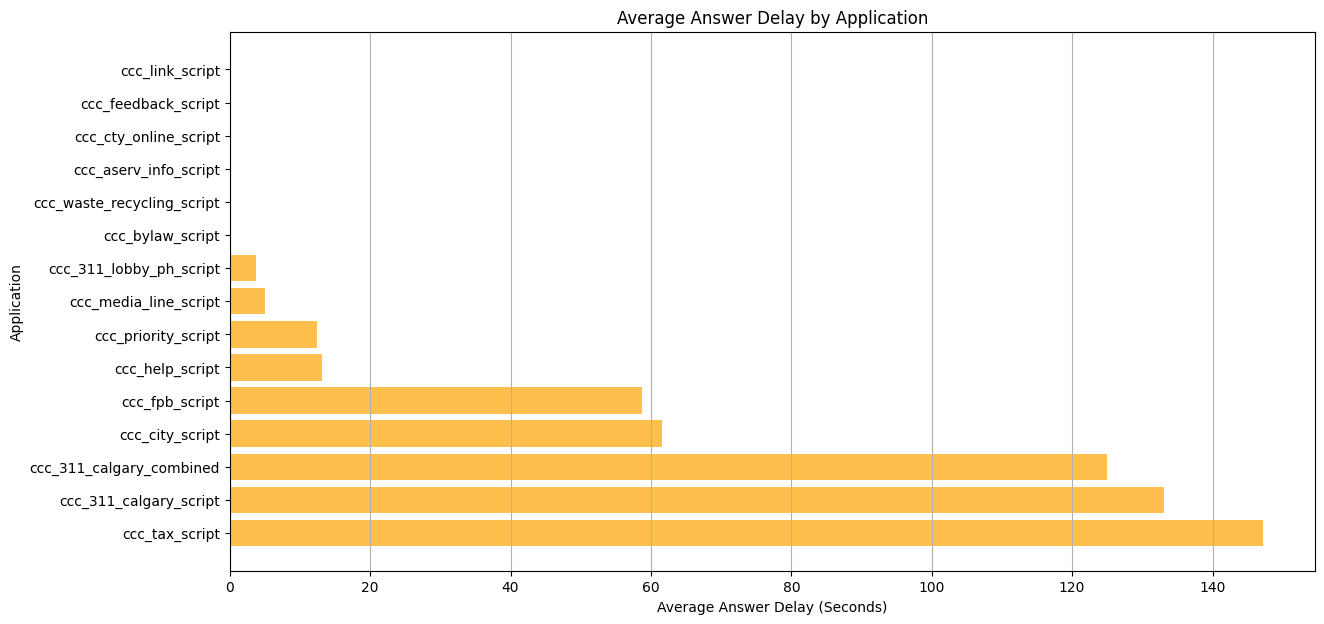

In [34]:
# Plot delay analysis by application
plt.figure(figsize=(14, 7))
plt.barh(delay_by_application['APPLICATION'], delay_by_application['AVG ANS DELAY SECONDS'], color='orange', alpha=0.7)
plt.title('Average Answer Delay by Application')
plt.xlabel('Average Answer Delay (Seconds)')
plt.ylabel('Application')
plt.grid(axis='x')
plt.show()

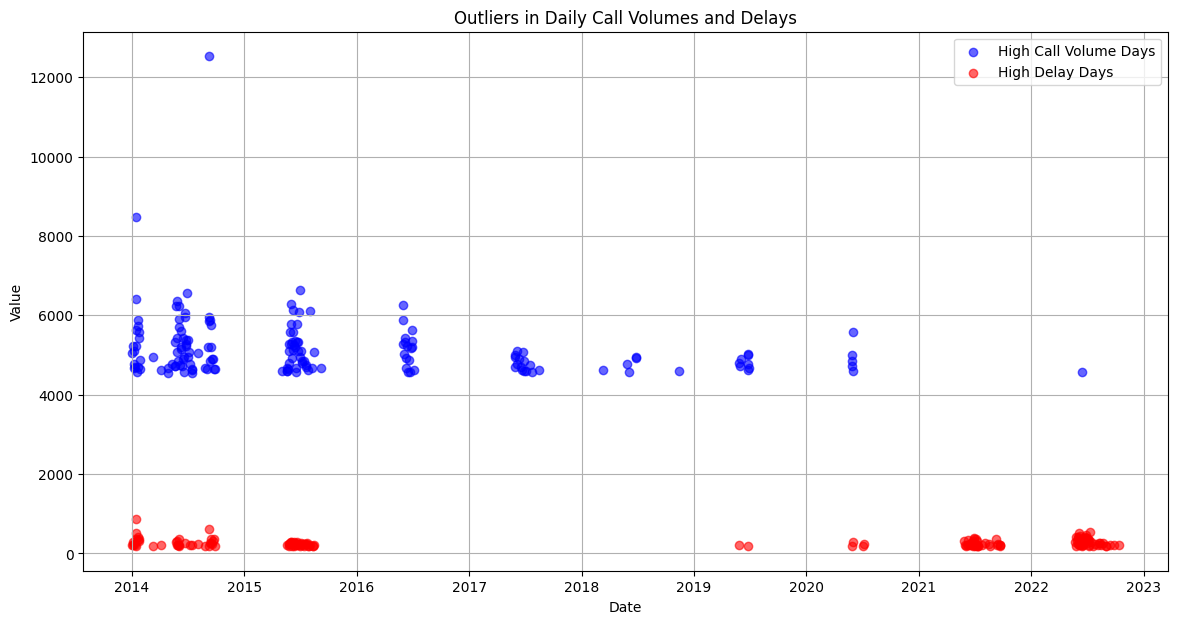

In [35]:
# Plot outlier analysis for days with high call volume
plt.figure(figsize=(14, 7))
plt.scatter(outliers_offer['Date'], outliers_offer['OFFERED'], color='blue', alpha=0.6, label='High Call Volume Days')
plt.scatter(outliers_delay['Date'], outliers_delay['AVG ANS DELAY SECONDS'], color='red', alpha=0.6, label='High Delay Days')
plt.title('Outliers in Daily Call Volumes and Delays')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()



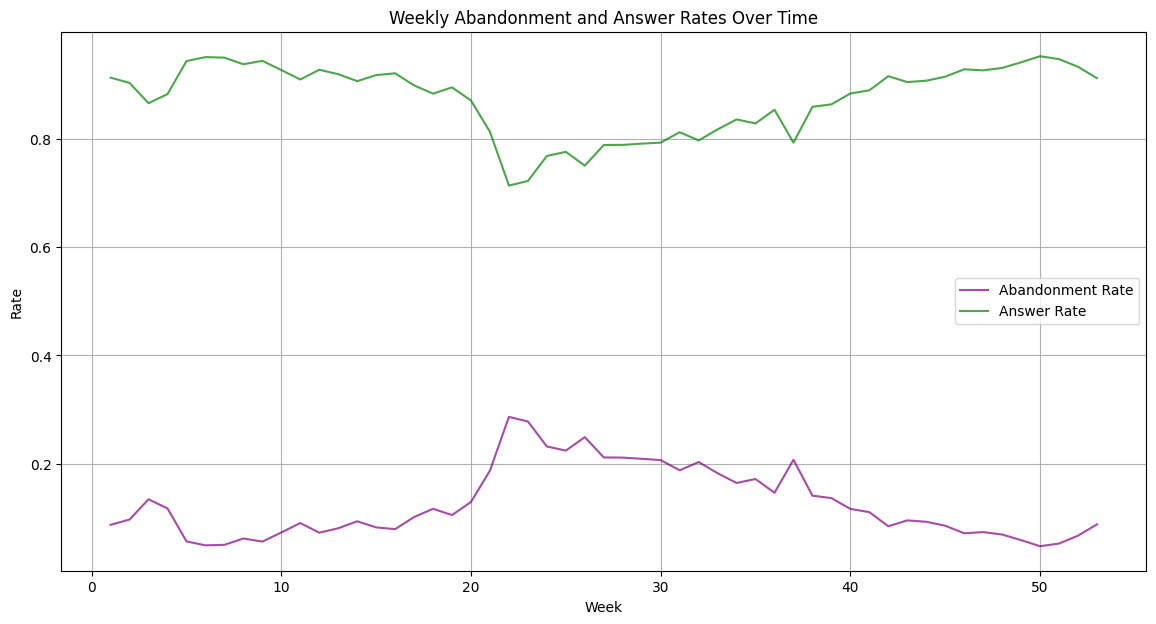

In [36]:
# Plot weekly trend analysis for abandonment and answer rates
plt.figure(figsize=(14, 7))
plt.plot(weekly_data['Week'], weekly_data['Abandonment Rate'], label='Abandonment Rate', color='purple', alpha=0.7)
plt.plot(weekly_data['Week'], weekly_data['Answer Rate'], label='Answer Rate', color='green', alpha=0.7)
plt.title('Weekly Abandonment and Answer Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Rate')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Return the list of outliers for user inspection
outliers_offer_info = outliers_offer[['Date', 'OFFERED']].head()
outliers_delay_info = outliers_delay[['Date', 'AVG ANS DELAY SECONDS']].head()

delay_by_application_info = delay_by_application.head()

outliers_offer_info, outliers_delay_info, delay_by_application_info

(        Date  OFFERED
 2 2014-01-03     5040
 5 2014-01-06     5225
 6 2014-01-07     5112
 7 2014-01-08     4683
 8 2014-01-09     4762,
         Date  AVG ANS DELAY SECONDS
 2 2014-01-03             210.333333
 3 2014-01-04             200.000000
 5 2014-01-06             291.333333
 6 2014-01-07             239.000000
 9 2014-01-10             219.666667,
                  APPLICATION  AVG ANS DELAY SECONDS  MAX ANS DELAY
 13            ccc_tax_script             147.208974           2626
 1     ccc_311_calgary_script             133.030084           2626
 0   ccc_311_calgary_combined             124.940419              0
 5            ccc_city_script              61.526276           2626
 8             ccc_fpb_script              58.746382           2626)

In [38]:
# Seasonal Analysis
# Aggregate data by month and quarter for seasonal trend analysis
monthly_trends = data.groupby(data['Date'].dt.to_period('M')).agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()

quarterly_trends = data.groupby(data['Date'].dt.to_period('Q')).agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()

# Event-Based Analysis
# Investigating dates with spikes in call volume or delays
significant_dates = daily_data[(daily_data['OFFERED'] > high_offer_threshold) | 
                               (daily_data['AVG ANS DELAY SECONDS'] > high_delay_threshold)]

# Performance Comparison Across Applications
# Calculating average metrics for each application
application_performance = data.groupby('APPLICATION').agg({
    'OFFERED': 'mean',
    'ANSWERED': 'mean',
    'ABANDONED': 'mean',
    'AVG ANS DELAY SECONDS': 'mean',
    'DelayCallsProduct': 'mean'
}).reset_index()



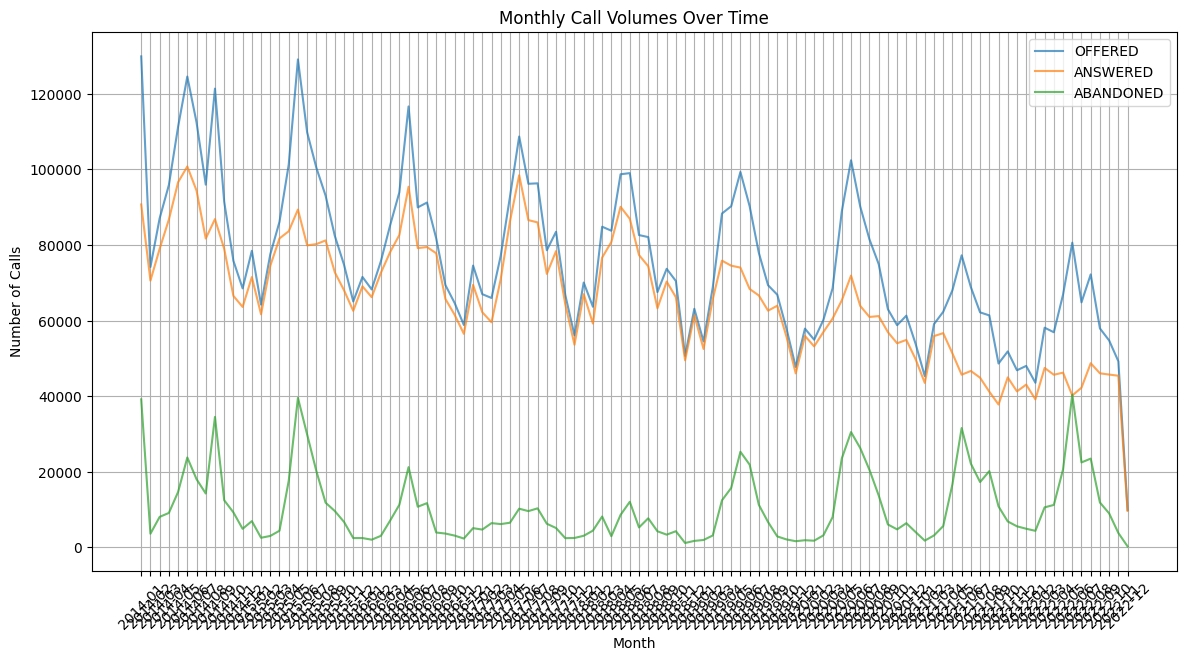

In [39]:
# Visualize the results
# Monthly Trends in Call Volumes and Delays
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends['Date'].astype(str), monthly_trends['OFFERED'], label='OFFERED', alpha=0.7)
plt.plot(monthly_trends['Date'].astype(str), monthly_trends['ANSWERED'], label='ANSWERED', alpha=0.7)
plt.plot(monthly_trends['Date'].astype(str), monthly_trends['ABANDONED'], label='ABANDONED', alpha=0.7)
plt.title('Monthly Call Volumes Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



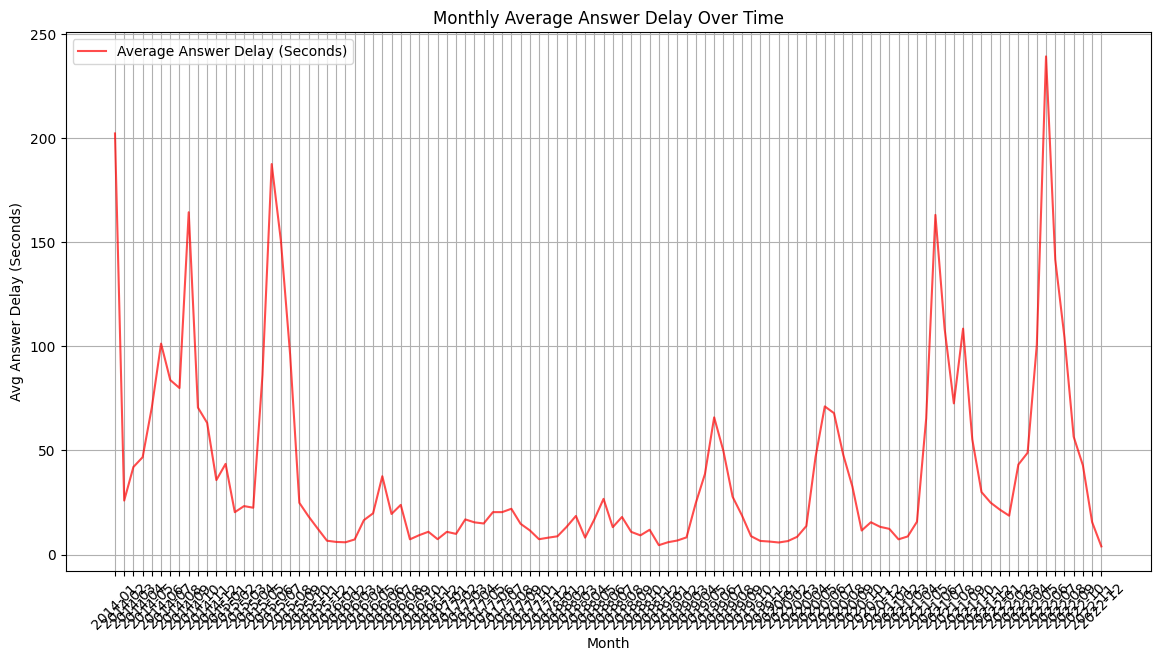

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends['Date'].astype(str), monthly_trends['AVG ANS DELAY SECONDS'], label='Average Answer Delay (Seconds)', color='r', alpha=0.7)
plt.title('Monthly Average Answer Delay Over Time')
plt.xlabel('Month')
plt.ylabel('Avg Answer Delay (Seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

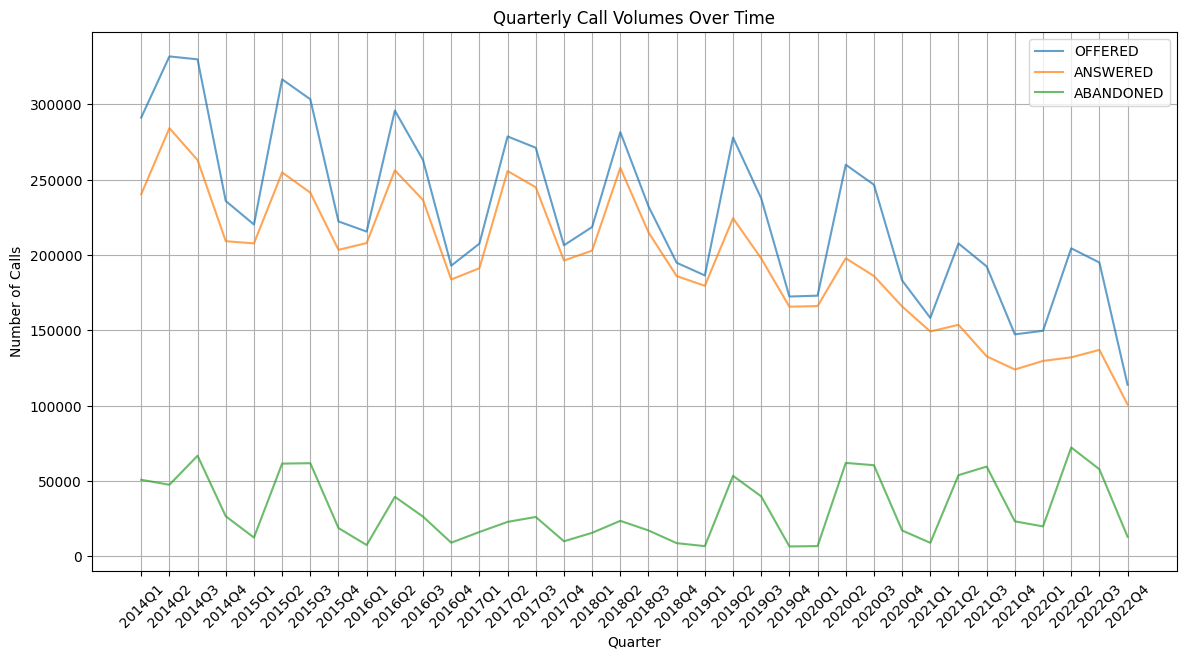

In [41]:
# Quarterly Trends
plt.figure(figsize=(14, 7))
plt.plot(quarterly_trends['Date'].astype(str), quarterly_trends['OFFERED'], label='OFFERED', alpha=0.7)
plt.plot(quarterly_trends['Date'].astype(str), quarterly_trends['ANSWERED'], label='ANSWERED', alpha=0.7)
plt.plot(quarterly_trends['Date'].astype(str), quarterly_trends['ABANDONED'], label='ABANDONED', alpha=0.7)
plt.title('Quarterly Call Volumes Over Time')
plt.xlabel('Quarter')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

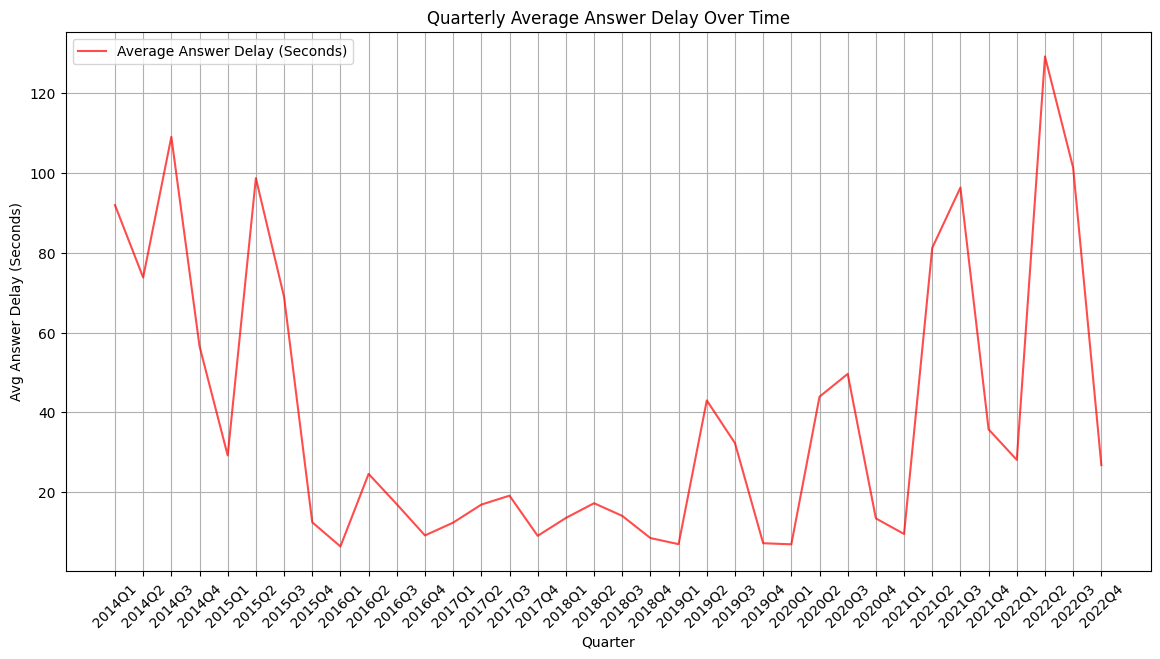

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(quarterly_trends['Date'].astype(str), quarterly_trends['AVG ANS DELAY SECONDS'], label='Average Answer Delay (Seconds)', color='r', alpha=0.7)
plt.title('Quarterly Average Answer Delay Over Time')
plt.xlabel('Quarter')
plt.ylabel('Avg Answer Delay (Seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

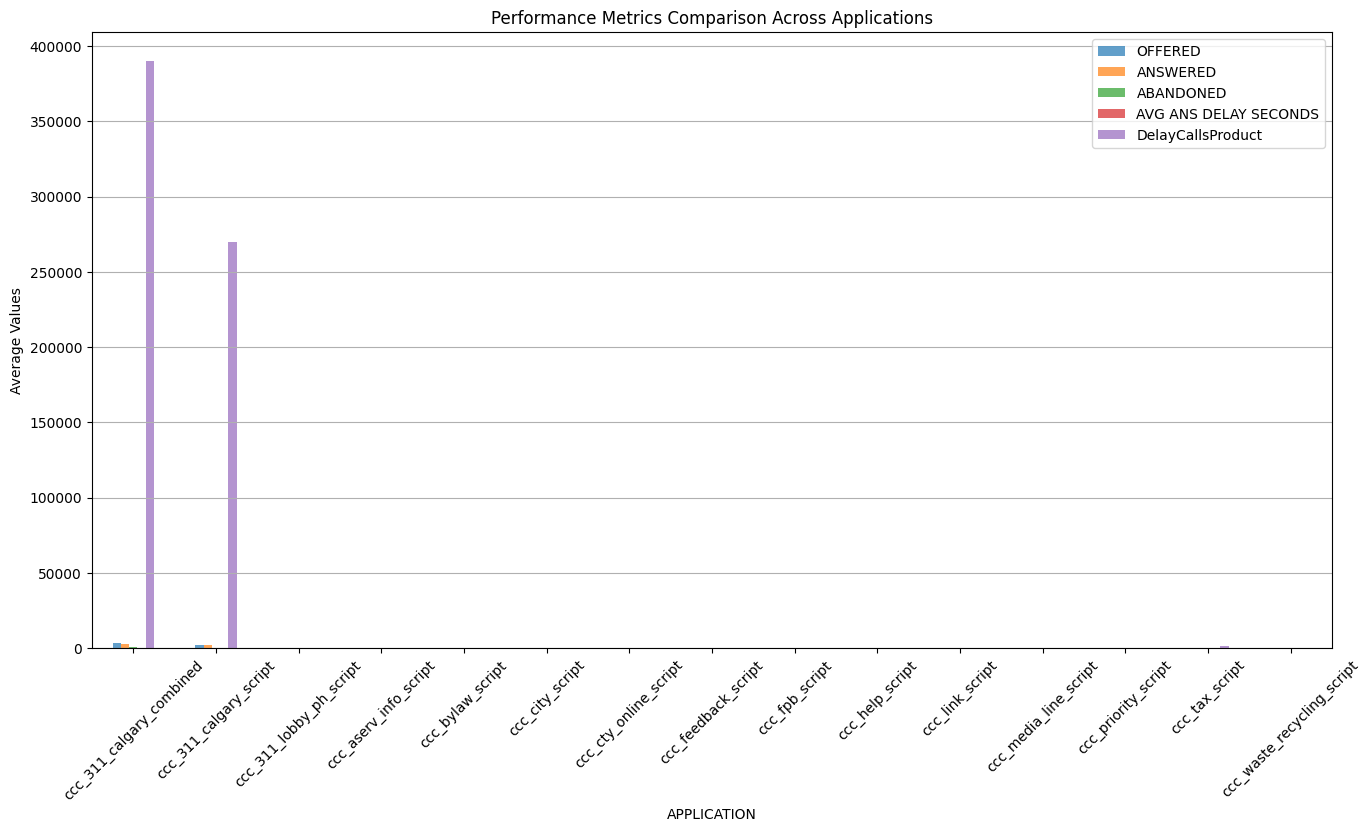

In [43]:
# Performance Comparison Across Applications
application_performance.plot(x='APPLICATION', kind='bar', figsize=(16, 8), alpha=0.7)
plt.title('Performance Metrics Comparison Across Applications')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [44]:
# Return the significant dates identified in the event-based analysis
significant_dates[['Date', 'OFFERED', 'AVG ANS DELAY SECONDS']]

,Date,OFFERED,AVG ANS DELAY SECONDS
2,2014-01-03,5040,210.333333
3,2014-01-04,2838,200.000000
5,2014-01-06,5225,291.333333
6,2014-01-07,5112,239.000000
7,2014-01-08,4683,107.666667
...,...,...,...
3148,2022-08-31,2874,189.500000
3149,2022-09-01,2812,196.642857
3162,2022-09-14,2619,201.928571
3174,2022-09-26,2609,207.214286


In [45]:
# Impact of Events or Holidays
# Define a list of major holidays that may affect call volume (example holidays)
holidays = ['2014-01-01', '2014-12-25', '2022-07-01', '2022-12-25']  # Adding New Year's Day, Christmas, and others

# Convert holidays to datetime format for comparison
holidays = pd.to_datetime(holidays)

# Add a column indicating whether each date is a holiday or not
daily_data['Holiday'] = daily_data['Date'].isin(holidays)

# Compare average metrics on holidays vs. non-holidays
holiday_analysis = daily_data.groupby('Holiday').agg({
    'OFFERED': 'mean',
    'ANSWERED': 'mean',
    'ABANDONED': 'mean',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()

# High-Abandonment Applications Analysis
# Identify applications with high average abandonment rates (>0.1 abandonment rate threshold)
high_abandonment_apps = application_analysis[application_analysis['Abandonment Rate'] > 0.1]



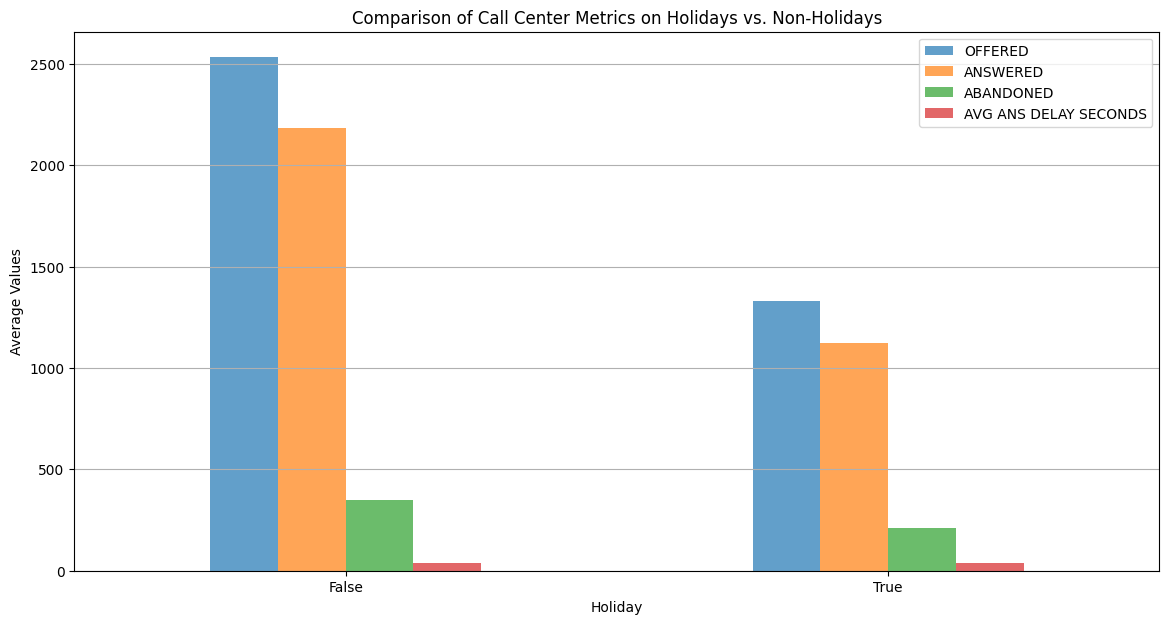

In [46]:
# Visualization of results
# Holiday vs. Non-Holiday Comparison
holiday_analysis.set_index('Holiday')[['OFFERED', 'ANSWERED', 'ABANDONED', 'AVG ANS DELAY SECONDS']].plot(
    kind='bar', figsize=(14, 7), alpha=0.7)
plt.title('Comparison of Call Center Metrics on Holidays vs. Non-Holidays')
plt.ylabel('Average Values')
plt.xlabel('Holiday')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


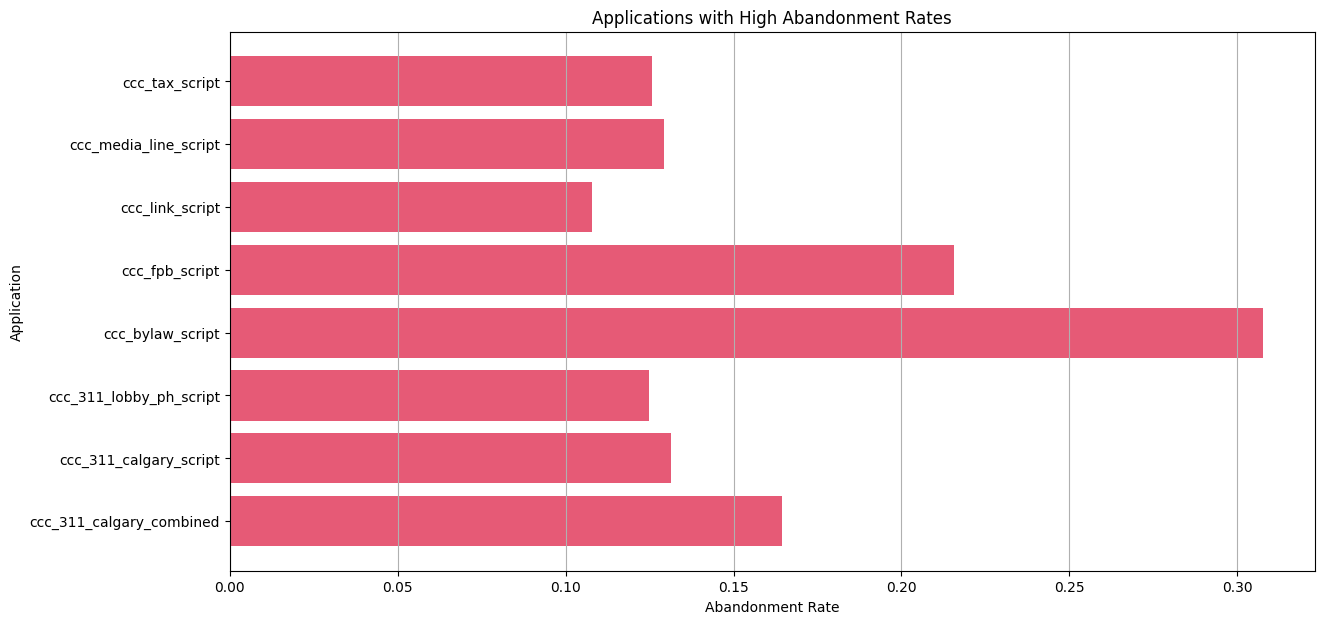

(   Holiday      OFFERED     ANSWERED   ABANDONED  AVG ANS DELAY SECONDS
 0    False  2531.077682  2181.679408  349.079531              39.653826
 1     True  1330.000000  1120.666667  209.333333              39.507937,
                  APPLICATION  Abandonment Rate  OFFERED  AVG ANS DELAY SECONDS
 0   ccc_311_calgary_combined          0.164435  1944312             124.940419
 1     ccc_311_calgary_script          0.131431  6093711             133.030084
 2    ccc_311_lobby_ph_script          0.124850     2507               3.664890
 4           ccc_bylaw_script          0.307692       13               0.167174
 8             ccc_fpb_script          0.215670     4901              58.746382
 10           ccc_link_script          0.107843      102               0.000000
 11     ccc_media_line_script          0.129263     1818               4.963442
 13            ccc_tax_script          0.125869    36538             147.208974)

In [47]:

# High-Abandonment Applications
plt.figure(figsize=(14, 7))
plt.barh(high_abandonment_apps['APPLICATION'], high_abandonment_apps['Abandonment Rate'], color='crimson', alpha=0.7)
plt.title('Applications with High Abandonment Rates')
plt.xlabel('Abandonment Rate')
plt.ylabel('Application')
plt.grid(axis='x')
plt.show()

# Return holiday analysis and high abandonment applications for user inspection
holiday_analysis_info = holiday_analysis
high_abandonment_apps_info = high_abandonment_apps[['APPLICATION', 'Abandonment Rate', 'OFFERED', 'AVG ANS DELAY SECONDS']]

holiday_analysis_info, high_abandonment_apps_info

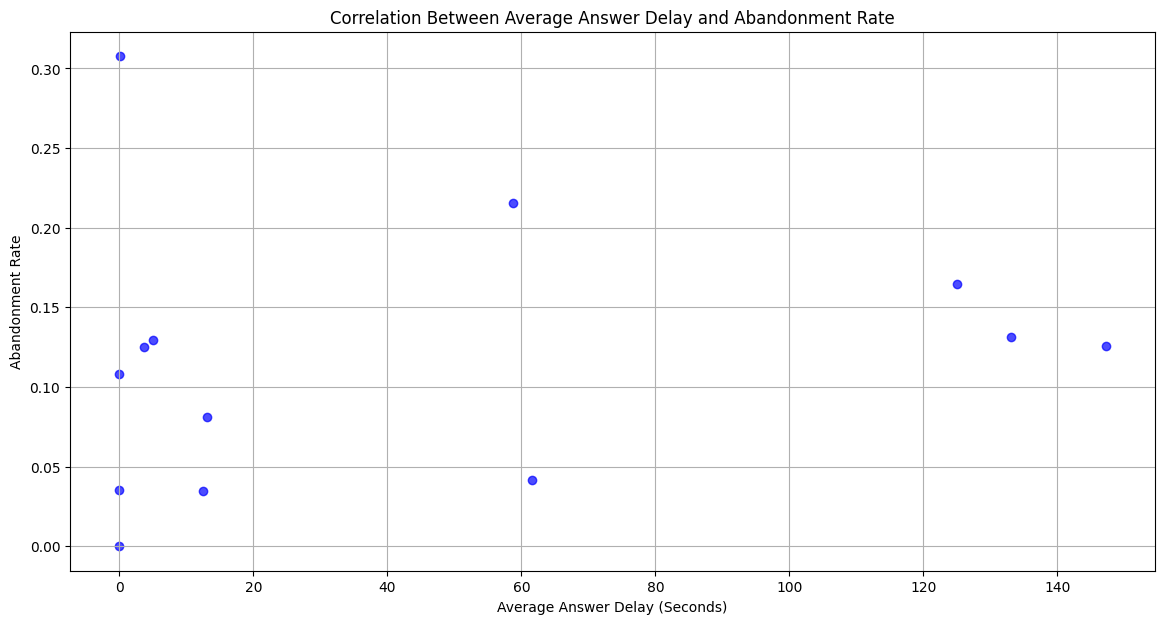

In [48]:
# Correlation Between Delays and Abandonment
# Scatter plot of average answer delay vs. abandonment rate for applications
plt.figure(figsize=(14, 7))
plt.scatter(application_analysis['AVG ANS DELAY SECONDS'], application_analysis['Abandonment Rate'], alpha=0.7, color='blue')
plt.title('Correlation Between Average Answer Delay and Abandonment Rate')
plt.xlabel('Average Answer Delay (Seconds)')
plt.ylabel('Abandonment Rate')
plt.grid()
plt.show()

# Trends for High-Abandonment Applications
# Filtering the original dataset for high-abandonment applications
high_abandonment_app_names = high_abandonment_apps['APPLICATION'].tolist()
high_abandonment_data = data[data['APPLICATION'].isin(high_abandonment_app_names)]

# Aggregating high-abandonment applications by month
monthly_high_abandonment = high_abandonment_data.groupby([high_abandonment_data['Date'].dt.to_period('M'), 'APPLICATION']).agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()



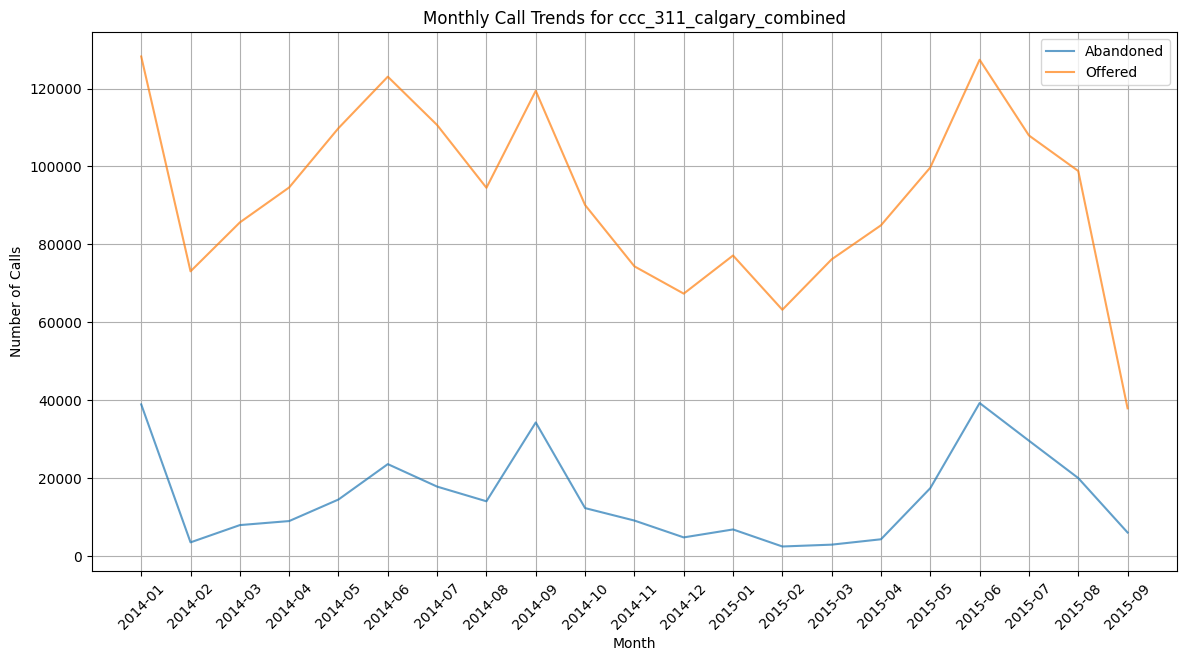

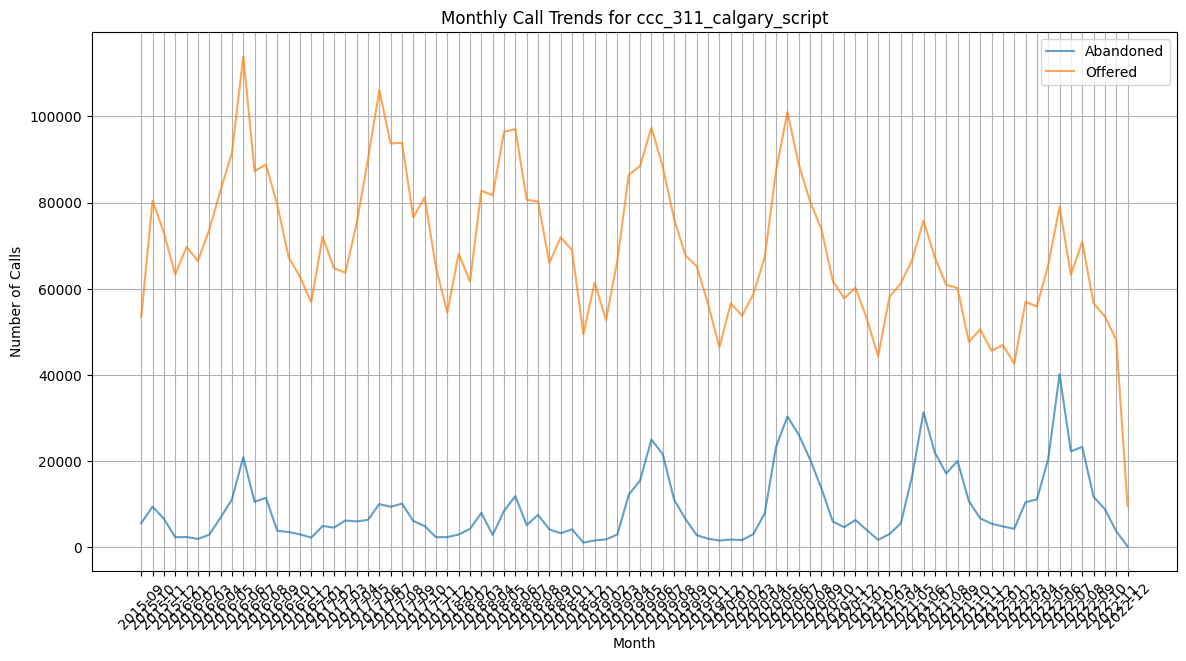

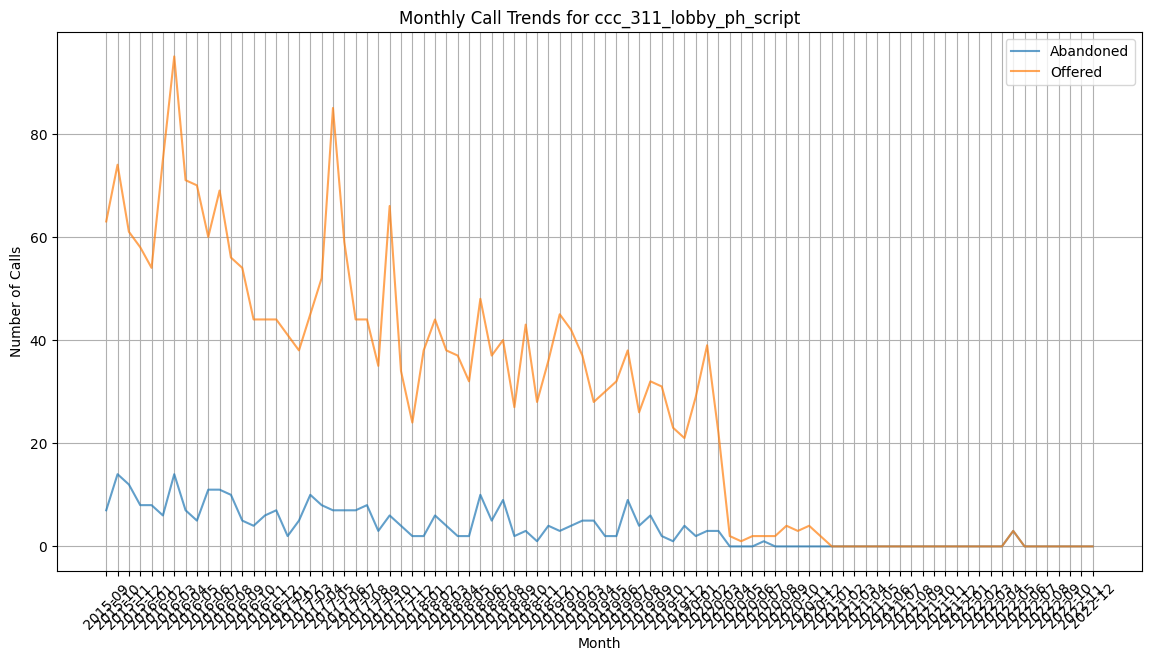

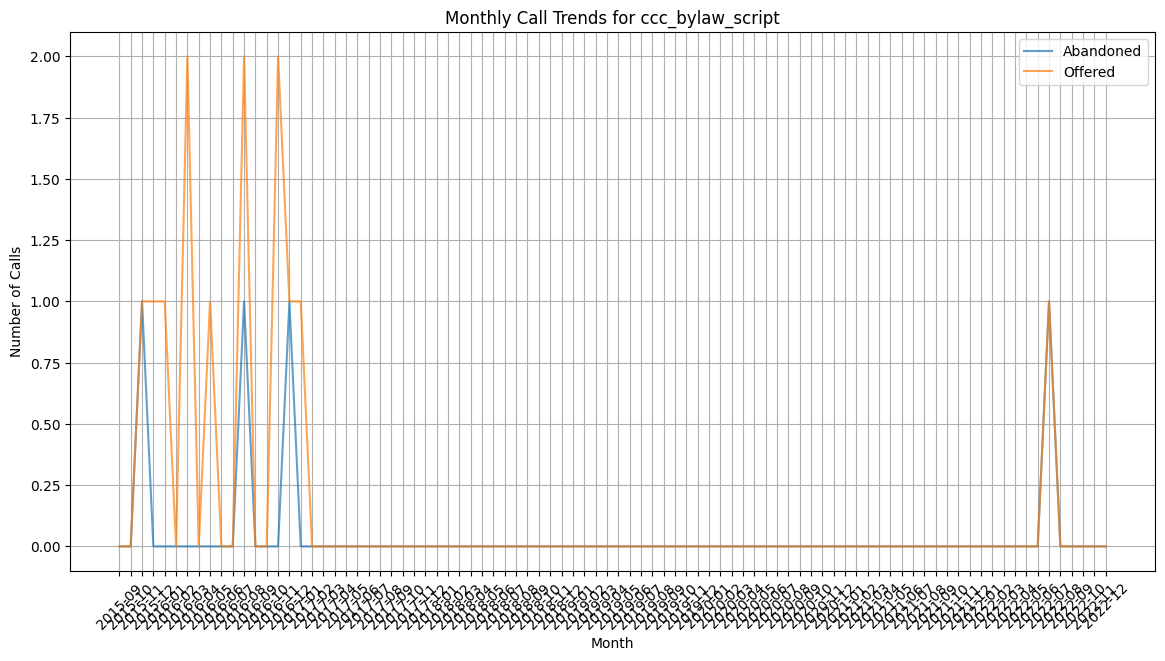

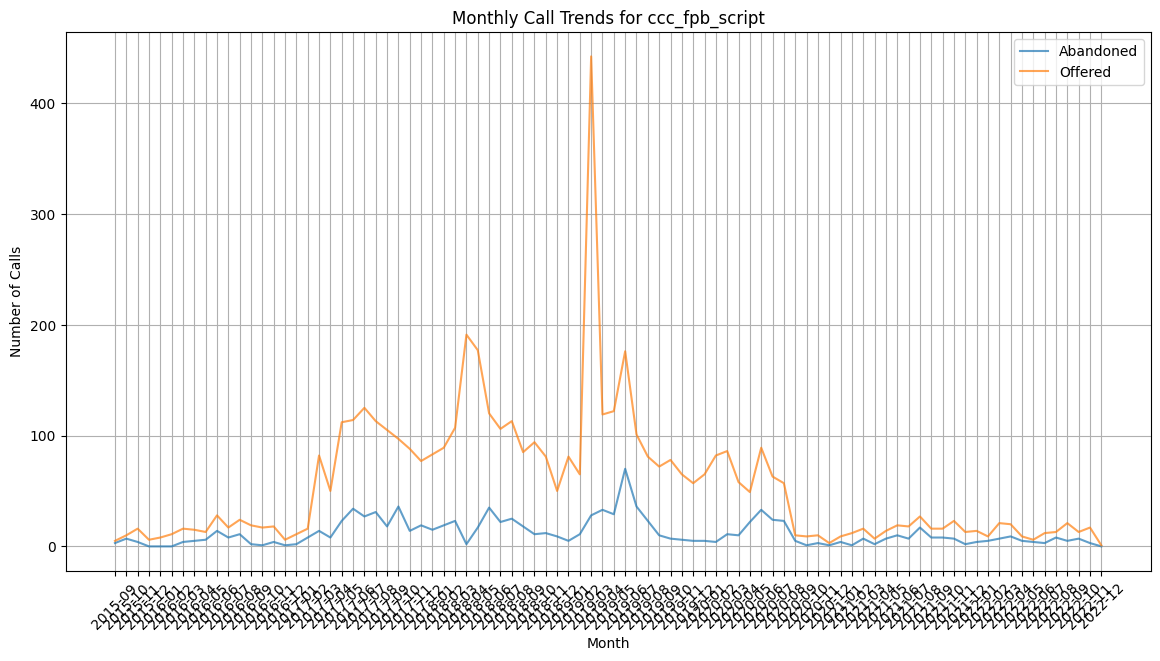

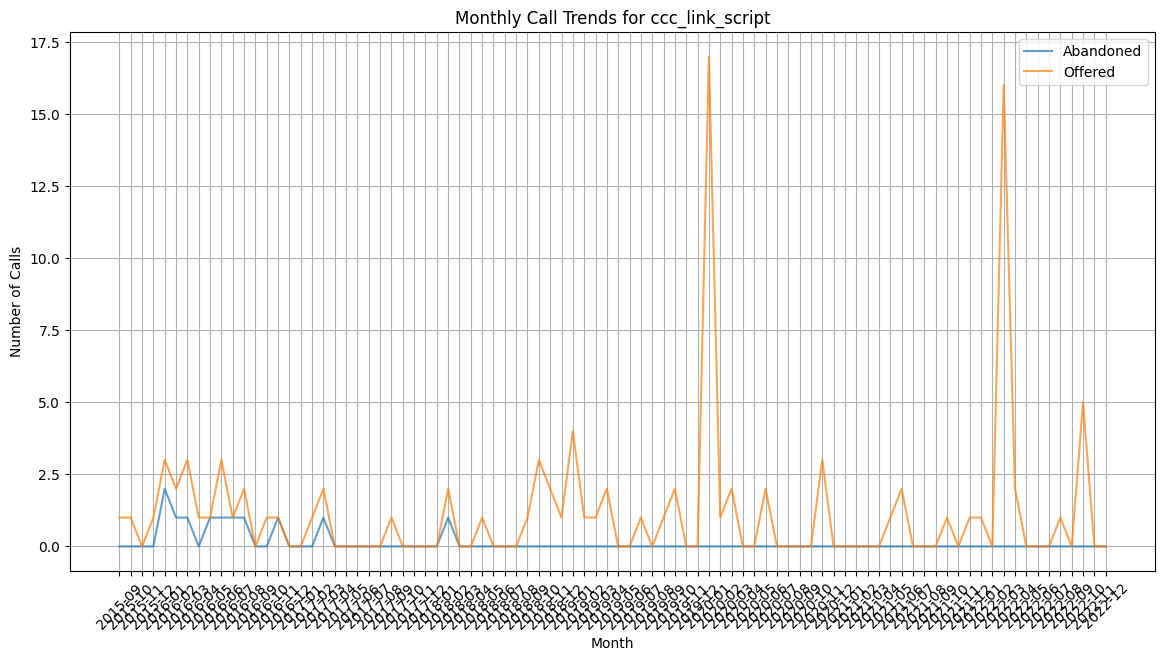

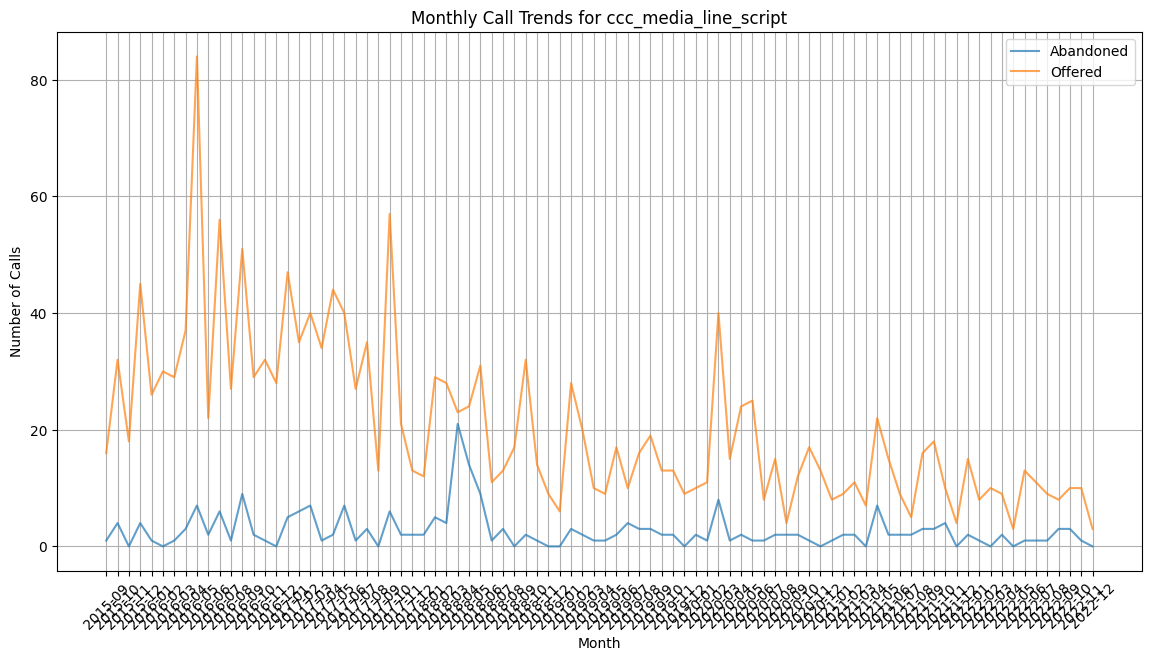

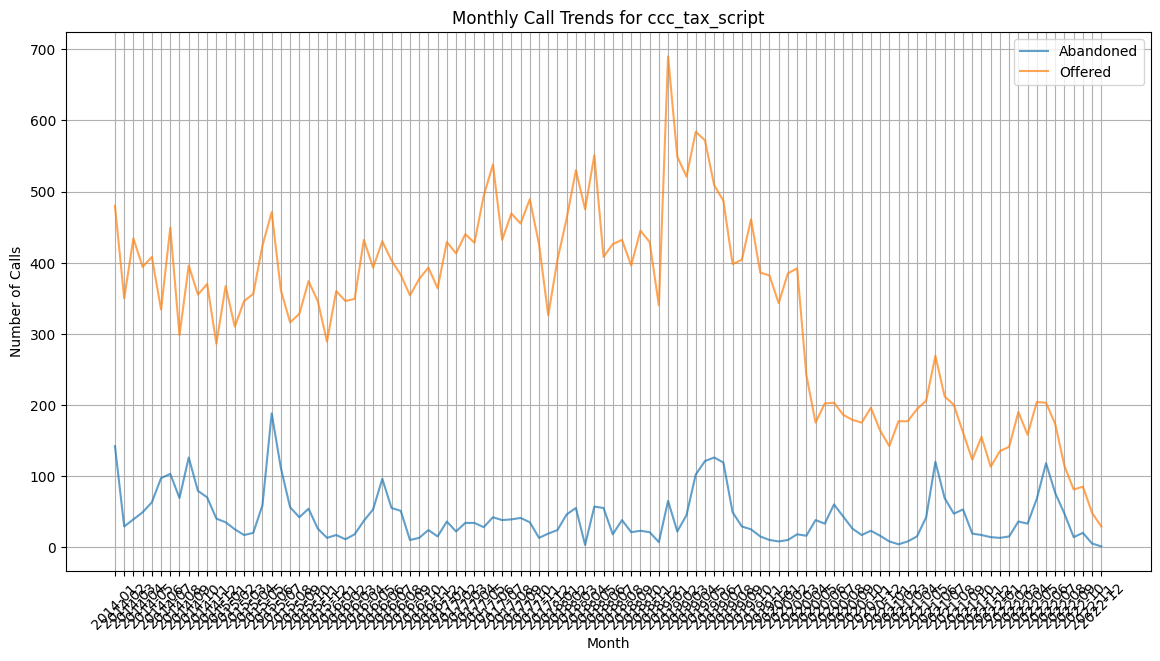

,Date,APPLICATION,OFFERED,ANSWERED,ABANDONED,AVG ANS DELAY SECONDS
0,2014-01,ccc_311_calgary_combined,128221,89256,38965,302.548387
1,2014-01,ccc_tax_script,480,338,142,296.111111
2,2014-02,ccc_311_calgary_combined,73104,69536,3568,29.392857
3,2014-02,ccc_tax_script,350,321,29,34.846154
4,2014-03,ccc_311_calgary_combined,85651,77655,7996,53.967742


In [49]:

# Plotting trends for high-abandonment applications
for app in high_abandonment_app_names:
    app_data = monthly_high_abandonment[monthly_high_abandonment['APPLICATION'] == app]
    plt.figure(figsize=(14, 7))
    plt.plot(app_data['Date'].astype(str), app_data['ABANDONED'], label='Abandoned', alpha=0.7)
    plt.plot(app_data['Date'].astype(str), app_data['OFFERED'], label='Offered', alpha=0.7)
    plt.title(f'Monthly Call Trends for {app}')
    plt.xlabel('Month')
    plt.ylabel('Number of Calls')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Return summary of trends for high-abandonment applications
monthly_high_abandonment.head()

/Users/tauhi/anaconda3/envs/nlp/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


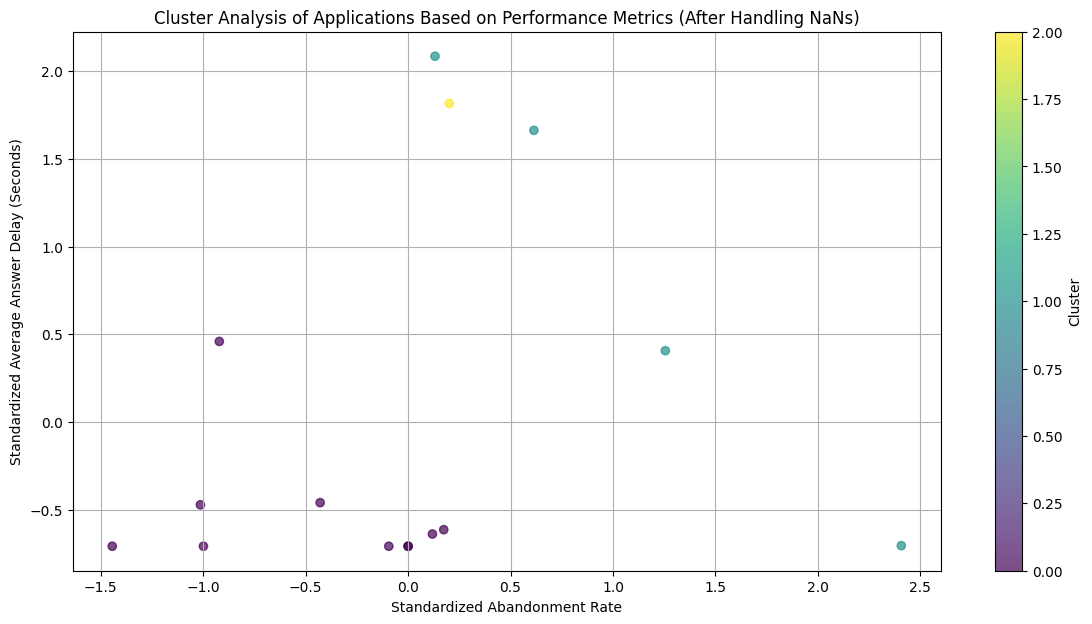

,APPLICATION,Abandonment Rate,AVG ANS DELAY SECONDS,OFFERED,Cluster
0,ccc_311_calgary_combined,0.164435,124.940419,1944312,1
1,ccc_311_calgary_script,0.131431,133.030084,6093711,2
2,ccc_311_lobby_ph_script,0.124850,3.664890,2507,0
3,ccc_aserv_info_script,NaN,0.000000,0,0
4,ccc_bylaw_script,0.307692,0.167174,13,1
5,ccc_city_script,0.041755,61.526276,12789,0
6,ccc_cty_online_script,NaN,0.000000,0,0
7,ccc_feedback_script,0.035556,0.000000,225,0
8,ccc_fpb_script,0.215670,58.746382,4901,1
9,ccc_help_script,0.081069,13.090066,34551,0


In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cluster Analysis for Applications
# Prepare the data for clustering (using 'Abandonment Rate', 'AVG ANS DELAY SECONDS', 'OFFERED')
clustering_data = application_analysis[['Abandonment Rate', 'AVG ANS DELAY SECONDS', 'OFFERED']].copy()

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


# Step to handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
clustering_data_imputed = imputer.fit_transform(clustering_data_scaled)

# Perform K-Means Clustering again
kmeans = KMeans(n_clusters=3, random_state=42)
application_analysis['Cluster'] = kmeans.fit_predict(clustering_data_imputed)

# Visualize the clusters
plt.figure(figsize=(14, 7))
plt.scatter(clustering_data_imputed[:, 0], clustering_data_imputed[:, 1], c=application_analysis['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Cluster Analysis of Applications Based on Performance Metrics (After Handling NaNs)')
plt.xlabel('Standardized Abandonment Rate')
plt.ylabel('Standardized Average Answer Delay (Seconds)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Return the application data with cluster assignments for inspection
application_analysis[['APPLICATION', 'Abandonment Rate', 'AVG ANS DELAY SECONDS', 'OFFERED', 'Cluster']]


In [52]:
# Analyze Trends Within Each Cluster
# Add cluster information to the original data for analysis
data_with_clusters = data.merge(application_analysis[['APPLICATION', 'Cluster']], on='APPLICATION', how='left')

# Aggregate data by month and cluster for trend analysis
monthly_trends_by_cluster = data_with_clusters.groupby([data_with_clusters['Date'].dt.to_period('M'), 'Cluster']).agg({
    'OFFERED': 'sum',
    'ANSWERED': 'sum',
    'ABANDONED': 'sum',
    'AVG ANS DELAY SECONDS': 'mean'
}).reset_index()



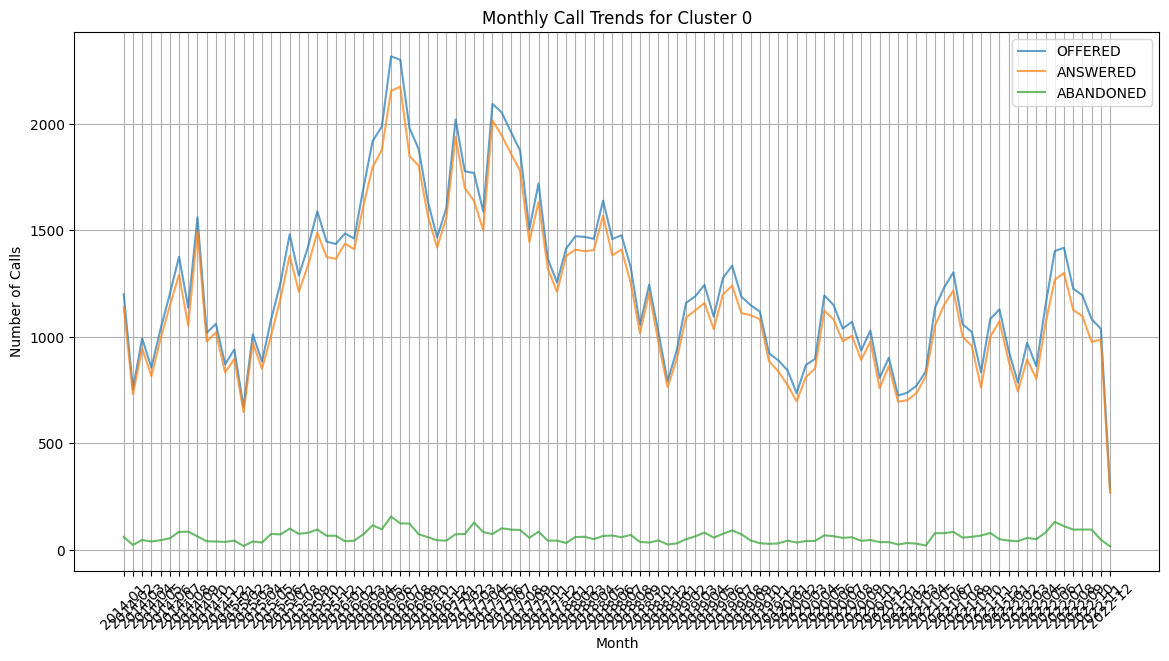

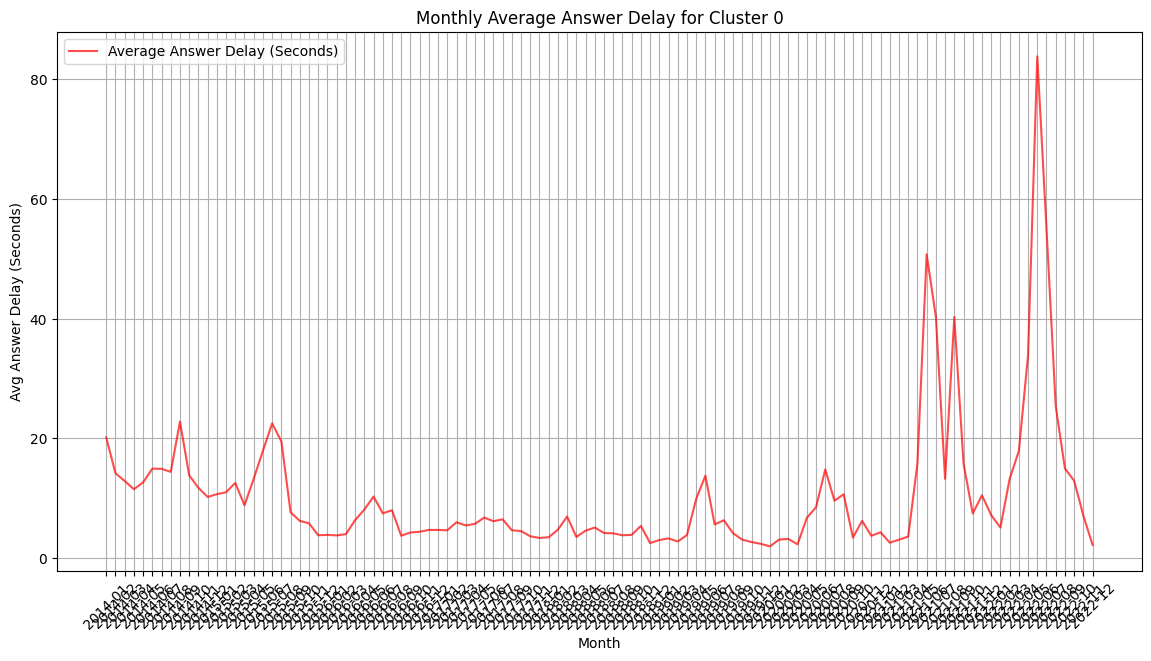

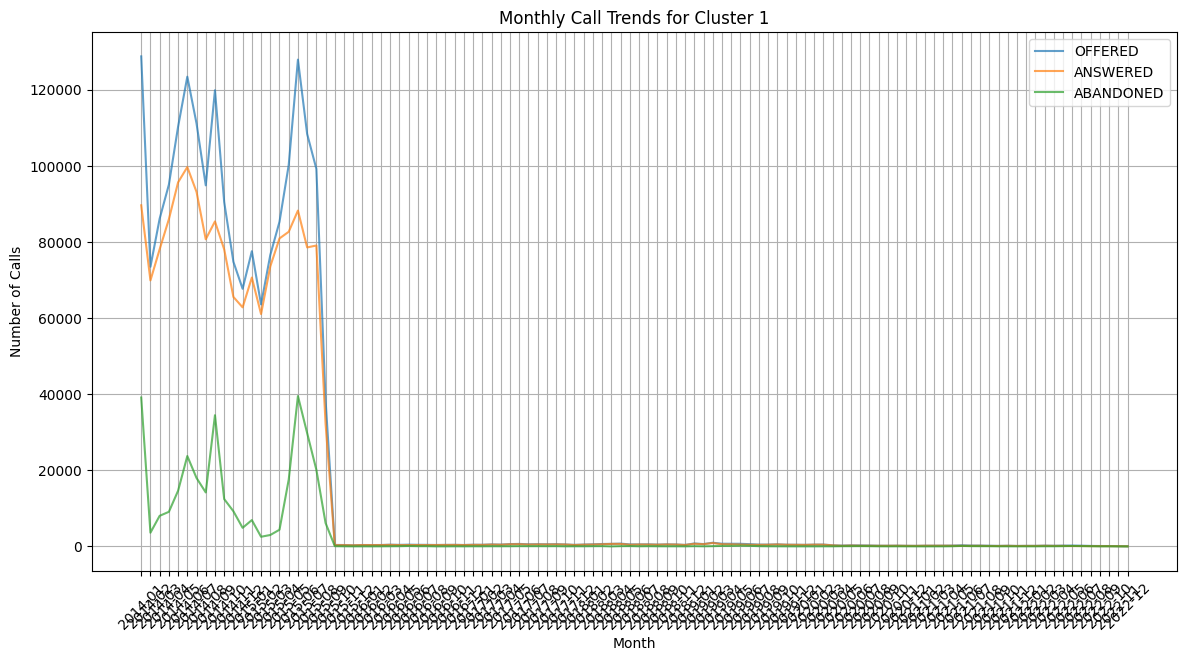

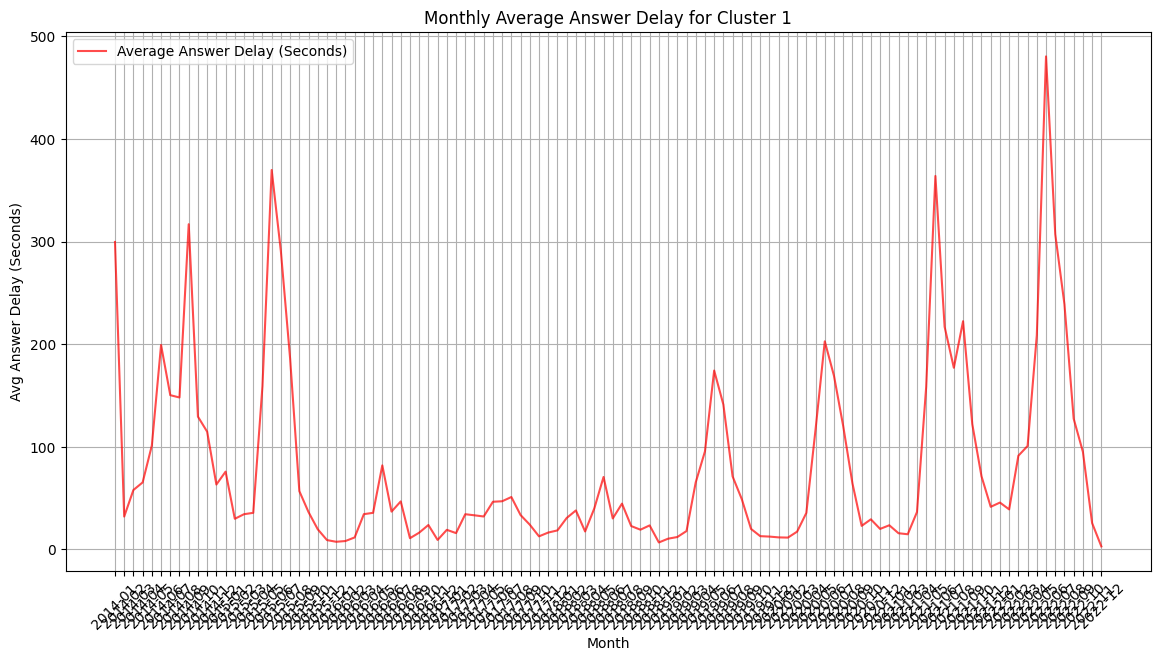

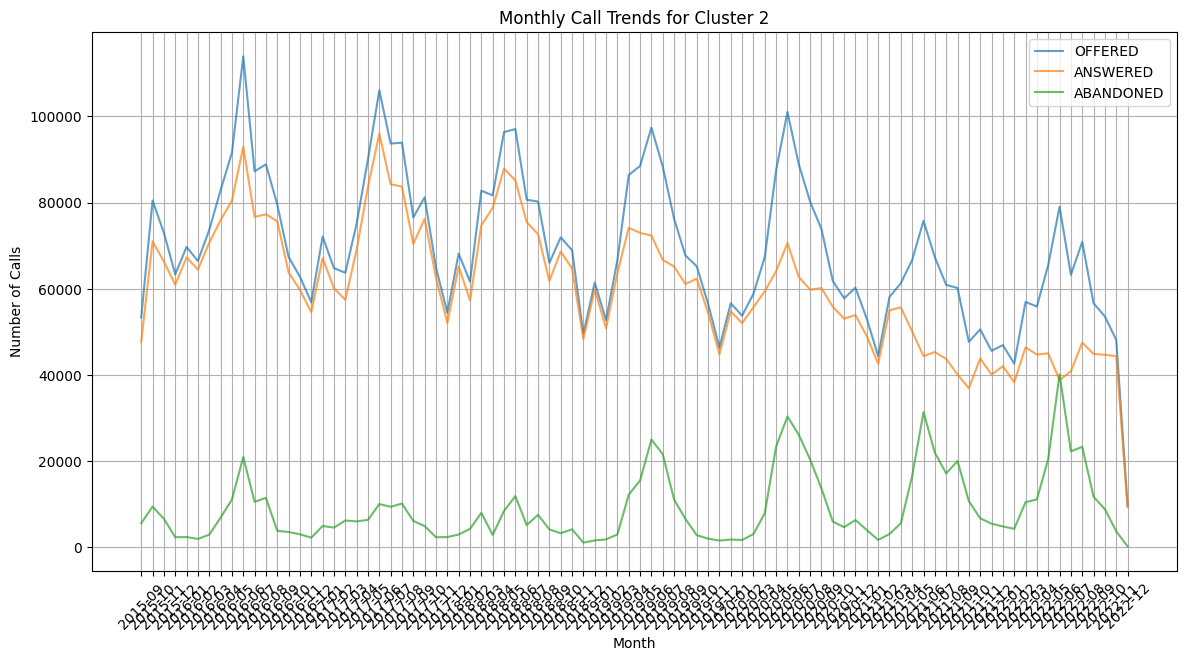

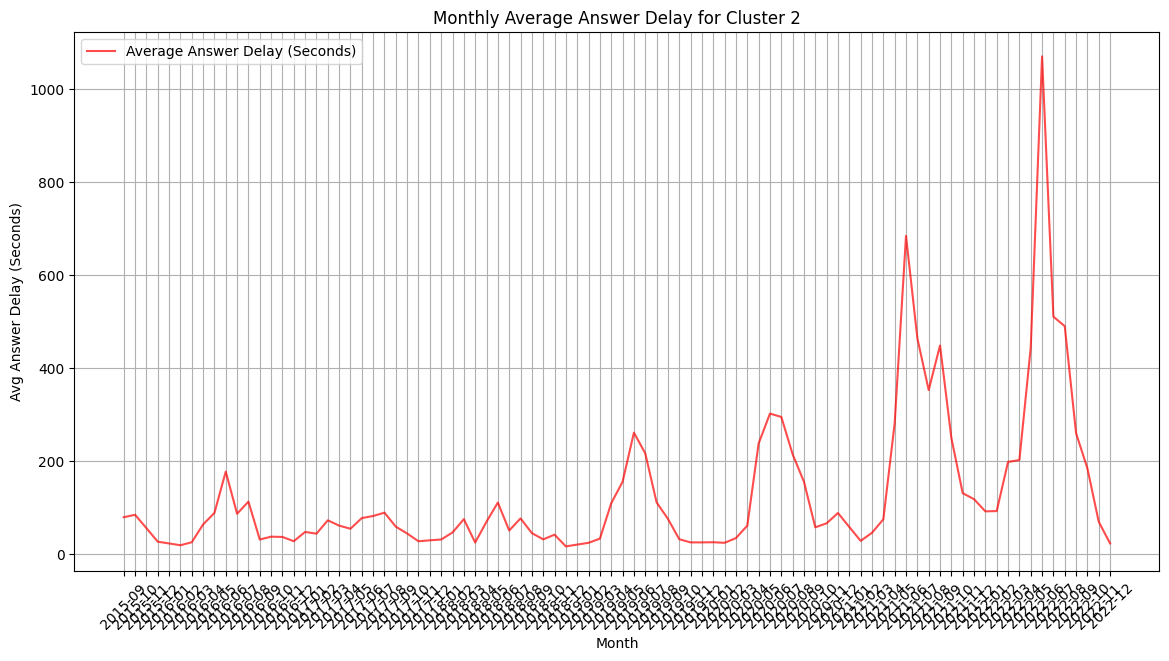

,Date,Cluster,OFFERED,ANSWERED,ABANDONED,AVG ANS DELAY SECONDS
0,2014-01,0,1200,1139,61,20.161290
1,2014-01,1,128701,89594,39107,299.551724
2,2014-02,0,755,731,24,14.178571
3,2014-02,1,73454,69857,3597,32.018519
4,2014-03,0,993,946,47,12.870968


In [53]:

# Plot trends for each cluster
for cluster in sorted(data_with_clusters['Cluster'].unique()):
    cluster_data = monthly_trends_by_cluster[monthly_trends_by_cluster['Cluster'] == cluster]
    plt.figure(figsize=(14, 7))
    plt.plot(cluster_data['Date'].astype(str), cluster_data['OFFERED'], label='OFFERED', alpha=0.7)
    plt.plot(cluster_data['Date'].astype(str), cluster_data['ANSWERED'], label='ANSWERED', alpha=0.7)
    plt.plot(cluster_data['Date'].astype(str), cluster_data['ABANDONED'], label='ABANDONED', alpha=0.7)
    plt.title(f'Monthly Call Trends for Cluster {cluster}')
    plt.xlabel('Month')
    plt.ylabel('Number of Calls')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(cluster_data['Date'].astype(str), cluster_data['AVG ANS DELAY SECONDS'], label='Average Answer Delay (Seconds)', color='r', alpha=0.7)
    plt.title(f'Monthly Average Answer Delay for Cluster {cluster}')
    plt.xlabel('Month')
    plt.ylabel('Avg Answer Delay (Seconds)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

# Return the monthly trends data for inspection
monthly_trends_by_cluster.head()